In [1]:
import pydicom as dcm
import numpy as np
import os
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


In [2]:
class Line:
    def __init__(self,color,sl_location,manufacturer,distance,proto,position,*coor):
        
        self.point1 = coor[0:3]
        self.point2 = coor[3:6]
        self.color = color
        self.slice_location = sl_location
        self.protocol = proto
        self.manufac = manufacturer
        self.distance = distance
        self.position = position

colors = {'2ch':'green',
         '3ch':'blue',
         '4ch':'red',
         'apical':'black',
         'basal':'magenta',
         'mid':'yellow'}

slices = {
    '3CH': '3ch', '3C': '3ch',
    '4CH': '4ch', '4C': '4ch',
    '2CH': '2ch', '2C': '2ch',
    'SA-B': 'basal', 'SAB': 'basal', 'BASAL': 'basal', 'BASE': 'basal', 'SLB': 'basal',
    'SA-M': 'mid', 'SAM': 'mid', 'MID': 'mid', 'SLM': 'mid',
    'SA-A': 'apical', 'SAA': 'apical', 'APICAL': 'apical', 'APEX': 'apical', 'SLA': 'apical'}


In [84]:
# paths = ['/home/minaessam/Documents/dicom_test/datasets_annotated_by_marina/',\
#          '/home/minaessam/Documents/dicom_test/datasets-annotated by-mayar']
paths = ['/home/minaessam/Documents/dicom_test/AL-MRK0795(HFrEF)']
#extract them into LA , SA and get the ImageOrientationPatient
i = [False,False]
lines = {'2ch':[],
        '3ch':[],
        '4ch':[],
        'apical':[],
        'basal':[],
        'mid':[]}
protocols = set()
def dist(positions):
    arr = np.array(positions)
    return np.sqrt(np.sum(arr**2))
for path in paths:
    for root,dirs,files in os.walk(path):
        for file in files:

            if ".dcm" in file.lower() :
                try:
                    image = dcm.read_file(os.path.join(root,file),force=True)
                    sl_type = ''
                    for key in slices.keys():
                        if key in file:
                            sl_type = slices[key]
                            #take only labeled stuff
                    if sl_type:
                        lines[sl_type].append(Line(colors[sl_type],image.SliceLocation,image.Manufacturer,\
                                            dist(image.ImagePositionPatient),image.ProtocolName,\
                                                   image.ImagePositionPatient,*image.ImageOrientationPatient))
                        timeframe = ''
                        for field in file.split('_')[3:]:
                            if "." in field:
                                timeframe = field
                        protocols.add((image.ProtocolName,sl_type,timeframe,image.Manufacturer))
                    
                        
                except  OSError:
                    print (OSError)
                    #break
            

#protocols


In [85]:
protocols

set()

In [77]:
total=0
found=0
for proto,slic,_,_ in protocols:
    
    if '2ch' == slic or '3ch' == slic or '4ch' == slic:
        if slic in proto.lower():
            found += 1
        total+=1
        

print(found*100/total)
print(found,total)

71.64179104477611
384 536


In [40]:
sa_proto = set()
for proto,slic,_,_ in protocols:
    
    if '3sl' in proto.lower():
        sa_proto.add((proto,slic))
sa_proto

{('WIP fSENC D10 SA 3sl CLEAR', 'apical'),
 ('WIP fSENC D10 SA 3sl CLEAR', 'basal'),
 ('WIP fSENC D10 SA 3sl CLEAR', 'mid'),
 ('WIP fSENC D20 SA 3sl CLEAR', 'apical'),
 ('WIP fSENC D20 SA 3sl CLEAR', 'basal'),
 ('WIP fSENC D20 SA 3sl CLEAR', 'mid'),
 ('WIP fSENC SA 3SL D 20 CLEAR', 'apical'),
 ('WIP fSENC SA 3SL D 20 CLEAR', 'basal'),
 ('WIP fSENC SA 3SL D 20 CLEAR', 'mid'),
 ('WIP fSENC SA 3SL rest CLEAR', 'apical'),
 ('WIP fSENC SA 3SL rest CLEAR', 'basal'),
 ('WIP fSENC SA 3SL rest CLEAR', 'mid'),
 ('WIP fSENC rec SA 3sl CLEAR', 'apical'),
 ('WIP fSENC rec SA 3sl CLEAR', 'basal'),
 ('WIP fSENC rec SA 3sl CLEAR', 'mid'),
 ('WIP fSENC rest SA 3sl CLEAR', 'apical'),
 ('WIP fSENC rest SA 3sl CLEAR', 'basal'),
 ('WIP fSENC rest SA 3sl CLEAR', 'mid')}

._IMG-0002-00008.dcm


/home/minaessam/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


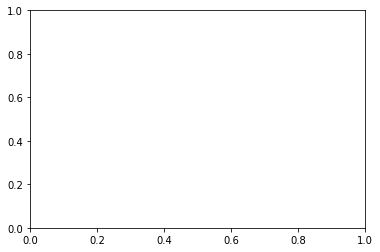

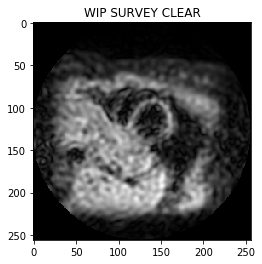

._IMG-0001-00029.dcm
._IMG-0001-00036.dcm
._IMG-0003-00010.dcm


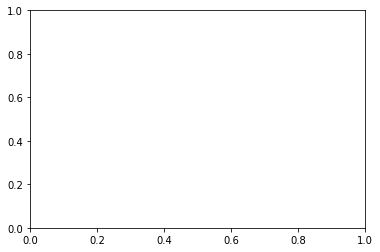

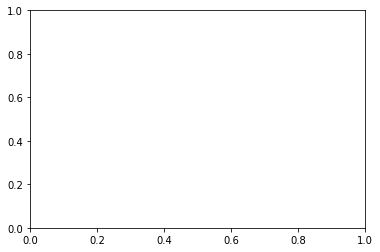

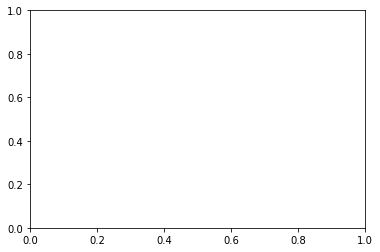

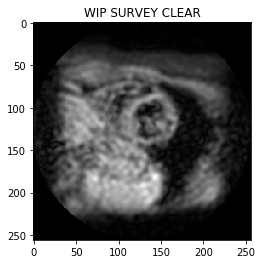

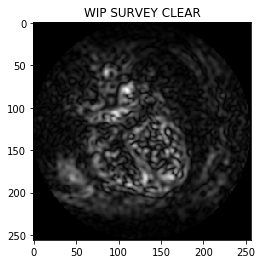

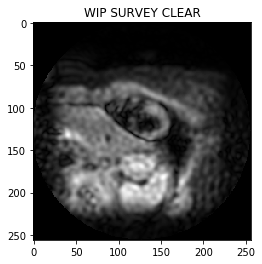

._IMG-0002-00009.dcm


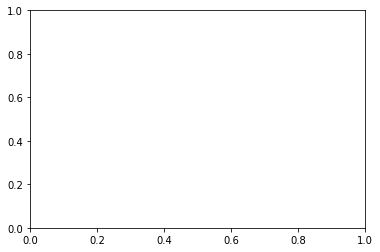

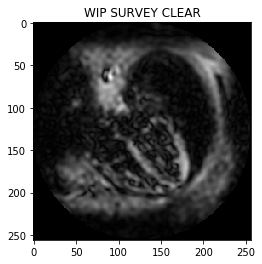

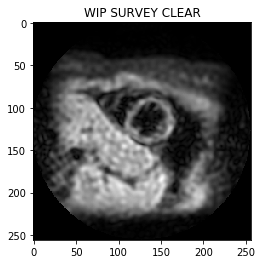

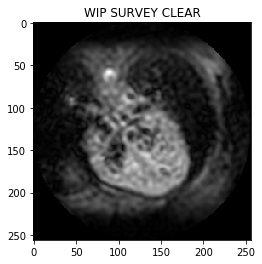

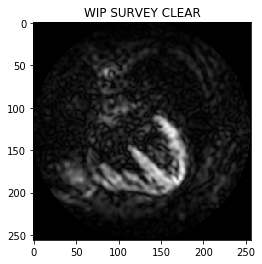

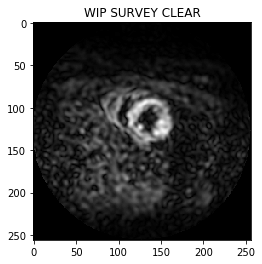

._IMG-0004-00007.dcm
._IMG-0001-00011.dcm


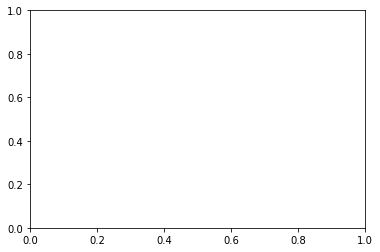

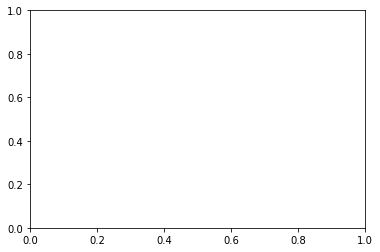

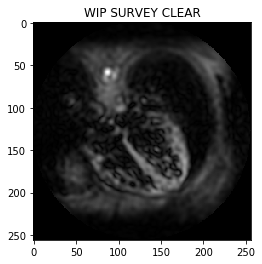

._IMG-0001-00030.dcm


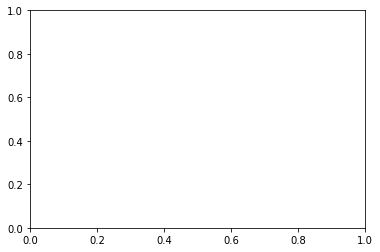

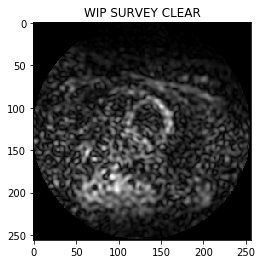

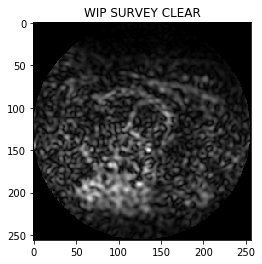

._IMG-0002-00005.dcm


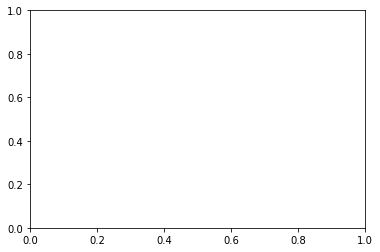

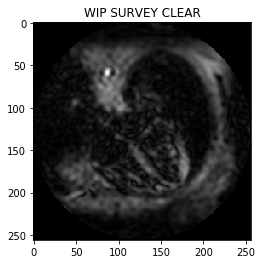

._IMG-0001-00037.dcm


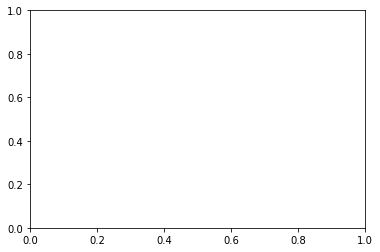

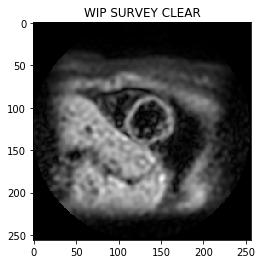

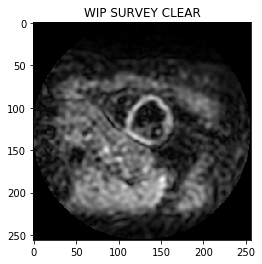

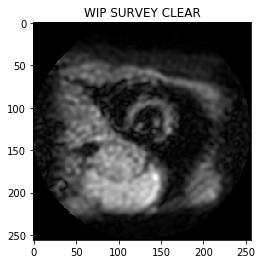

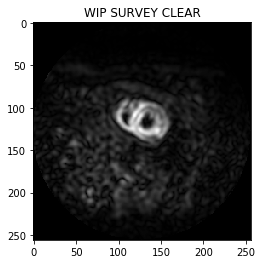

._IMG-0002-00004.dcm
._IMG-0001-00053.dcm
._IMG-0004-00005.dcm
._IMG-0002-00015.dcm
._IMG-0003-00017.dcm
._IMG-0001-00018.dcm
._IMG-0004-00020.dcm
._IMG-0003-00004.dcm
._IMG-0004-00012.dcm


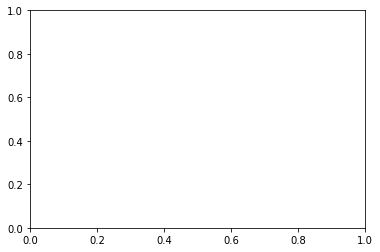

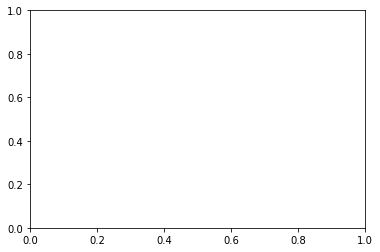

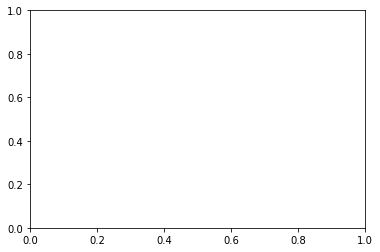

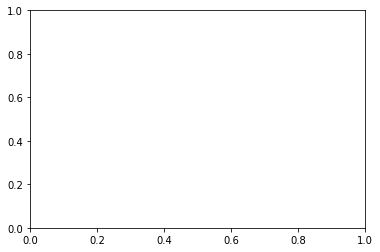

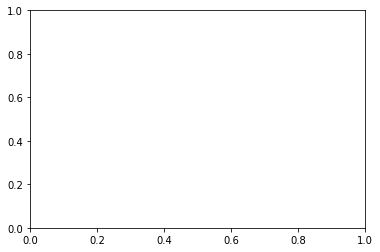

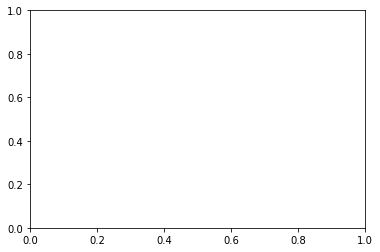

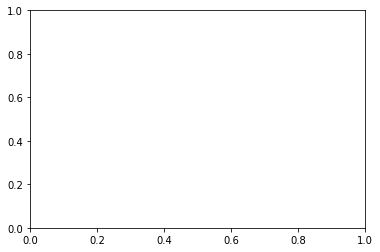

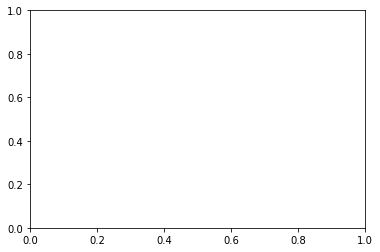

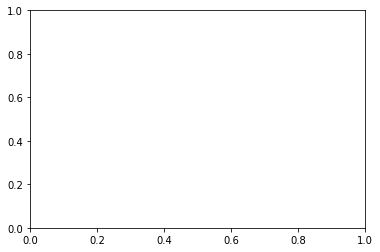

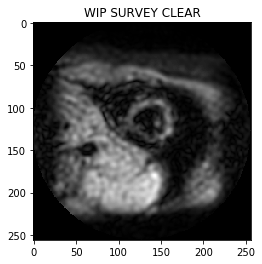

._IMG-0004-00018.dcm


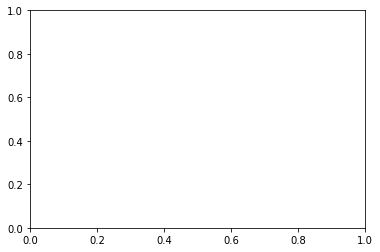

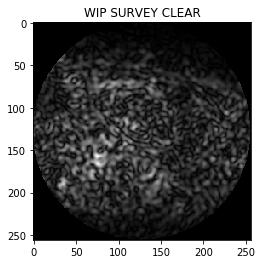

._IMG-0004-00006.dcm


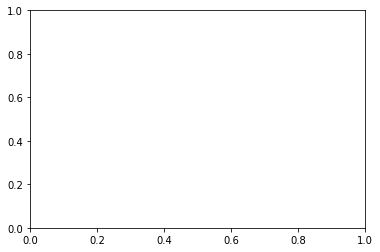

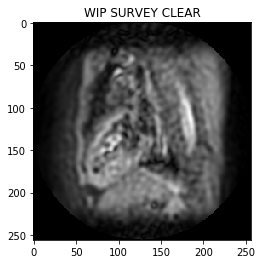

._IMG-0001-00008.dcm


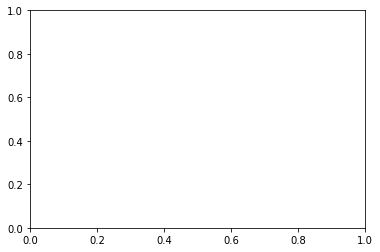

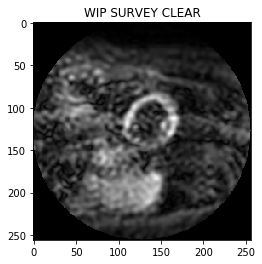

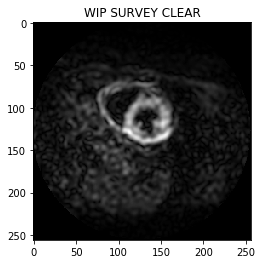

._IMG-0001-00012.dcm


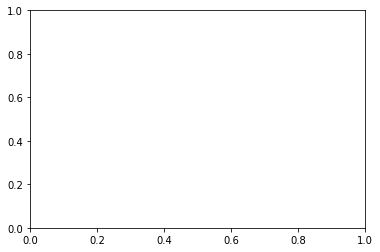

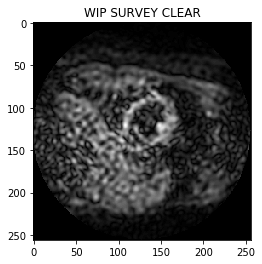

._IMG-0004-00011.dcm


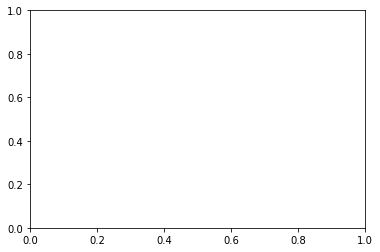

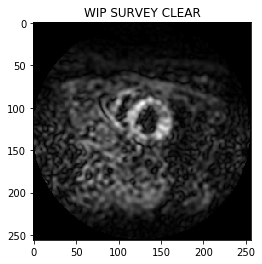

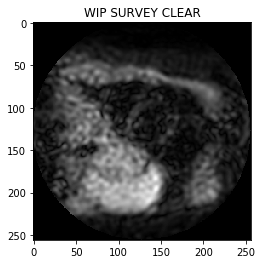

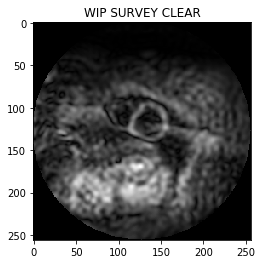

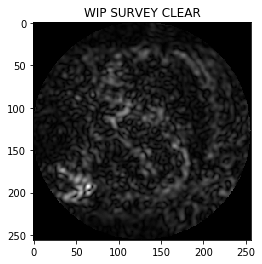

._IMG-0002-00019.dcm
._IMG-0001-00052.dcm
._IMG-0003-00015.dcm
._IMG-0001-00031.dcm
._IMG-0003-00005.dcm


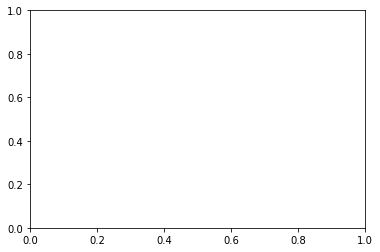

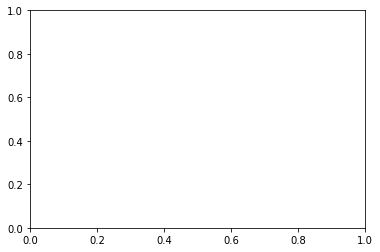

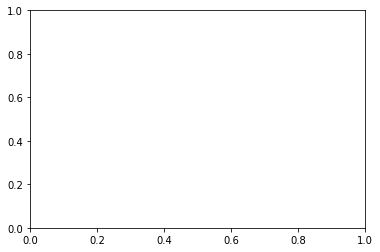

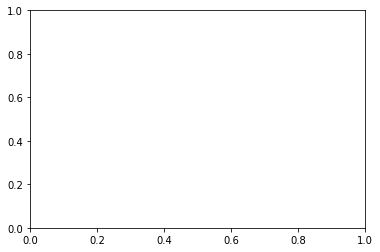

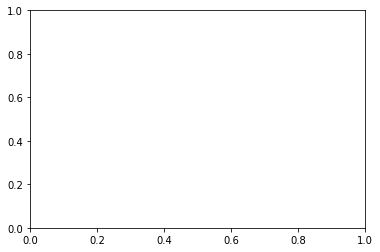

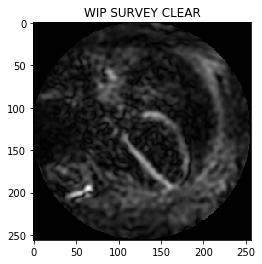

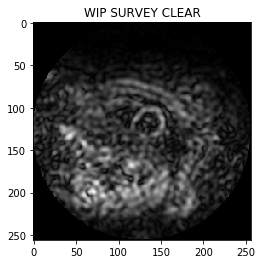

._IMG-0003-00006.dcm
._IMG-0001-00047.dcm
._IMG-0001-00048.dcm


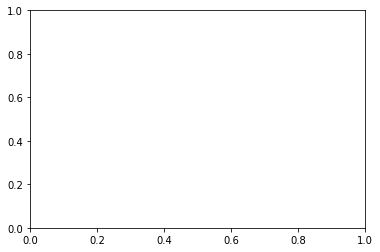

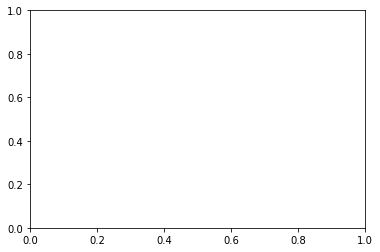

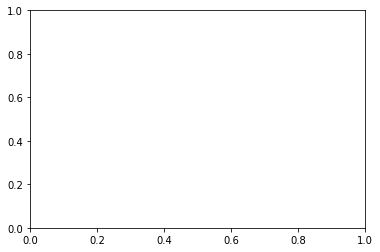

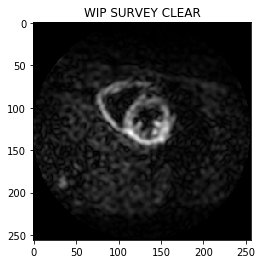

._IMG-0004-00016.dcm
._IMG-0003-00018.dcm


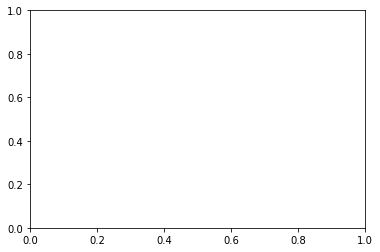

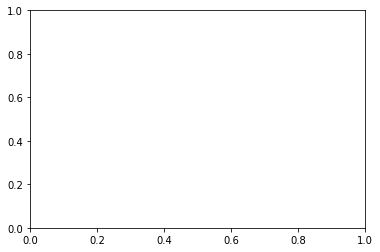

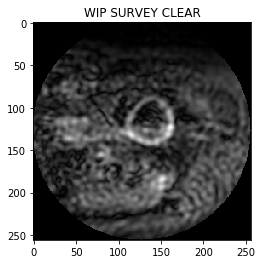

._IMG-0001-00016.dcm


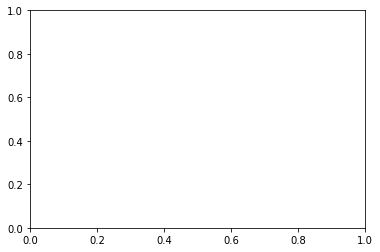

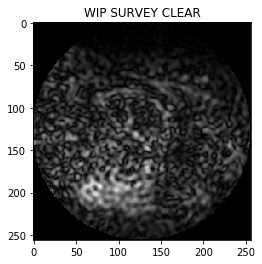

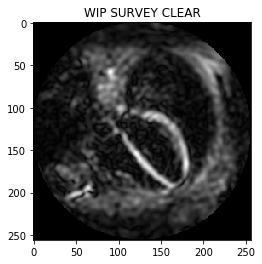

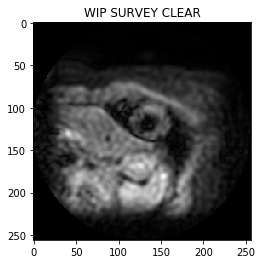

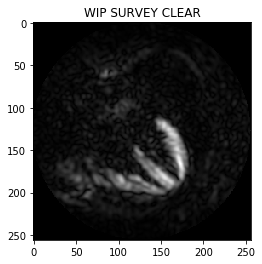

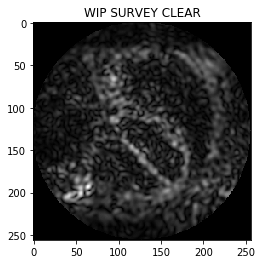

._IMG-0001-00015.dcm


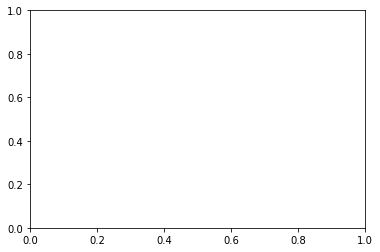

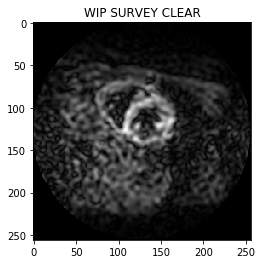

._IMG-0003-00012.dcm
._IMG-0004-00001.dcm


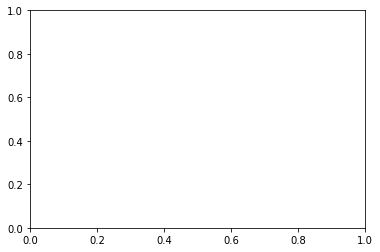

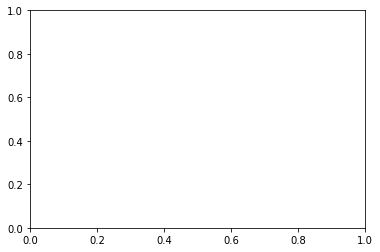

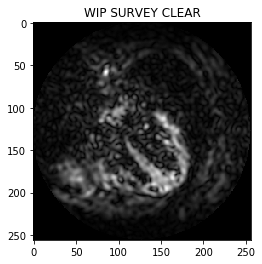

._IMG-0001-00005.dcm


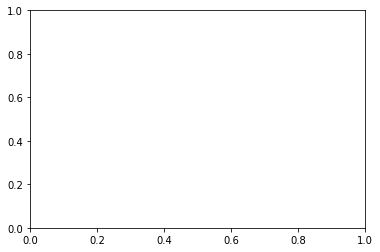

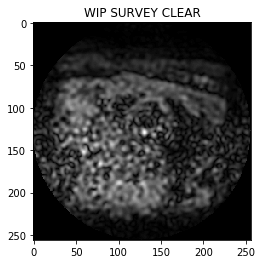

._IMG-0002-00012.dcm
._IMG-0003-00007.dcm
._IMG-0002-00003.dcm


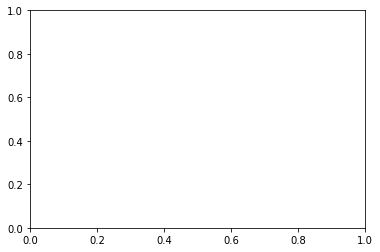

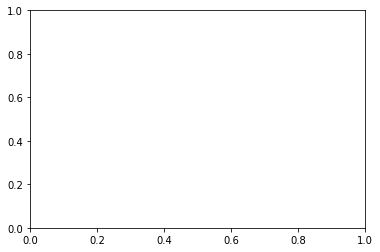

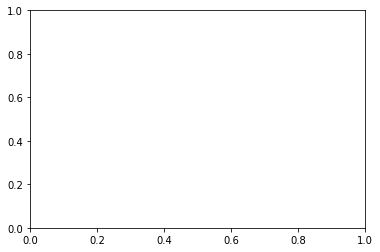

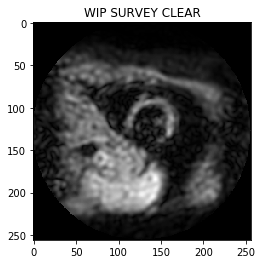

._IMG-0001-00022.dcm
._IMG-0001-00014.dcm
._IMG-0001-00017.dcm


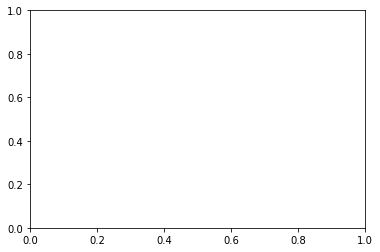

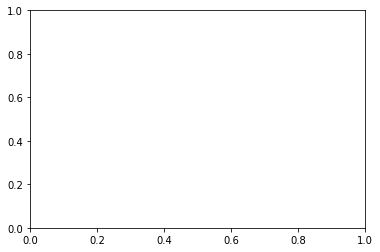

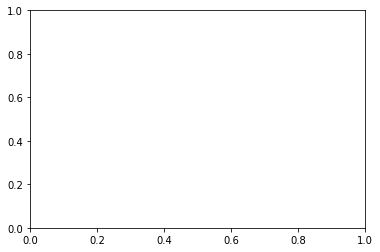

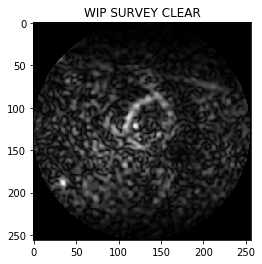

._IMG-0002-00017.dcm


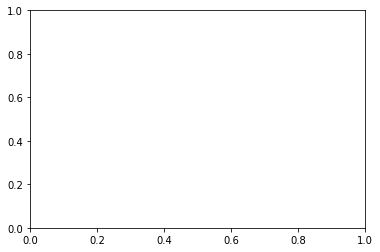

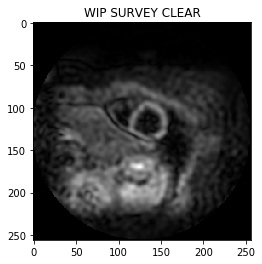

._IMG-0001-00057.dcm
._IMG-0001-00046.dcm


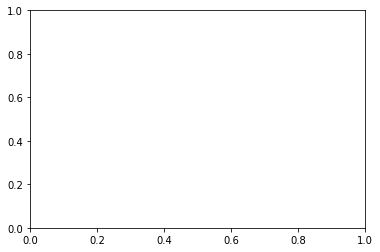

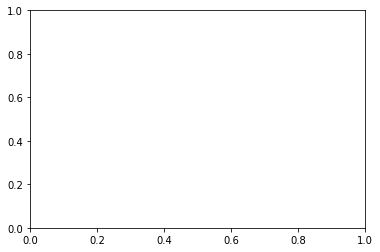

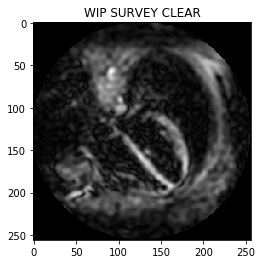

._IMG-0001-00041.dcm
._IMG-0004-00019.dcm
._IMG-0003-00002.dcm


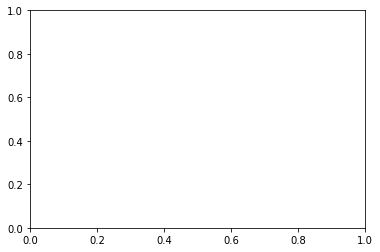

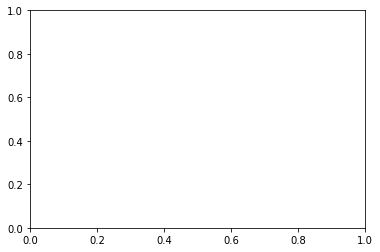

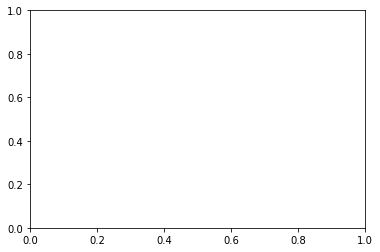

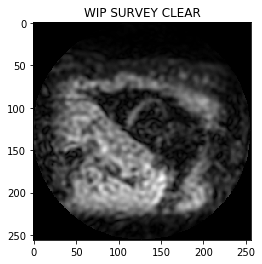

._IMG-0004-00004.dcm
._IMG-0004-00010.dcm
._IMG-0001-00045.dcm
._IMG-0004-00002.dcm


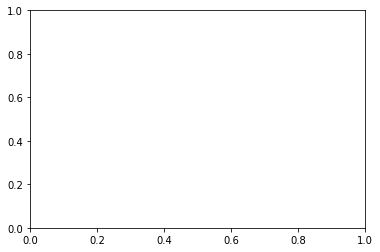

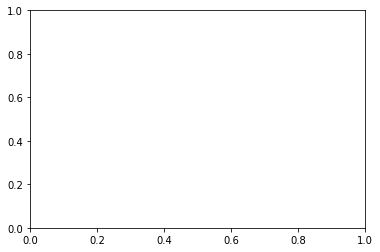

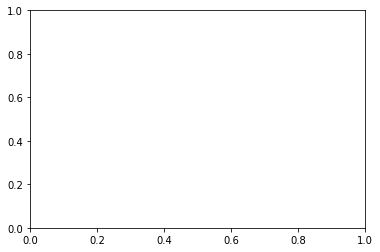

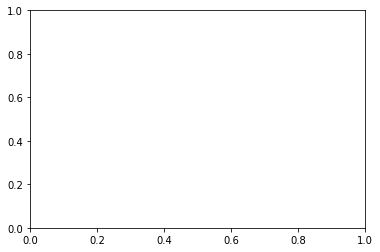

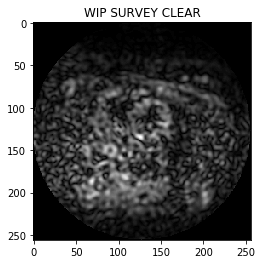

FTGoe_04.myo
._IMG-0001-00043.dcm
._IMG-0001-00054.dcm
._IMG-0004-00009.dcm
._IMG-0001-00023.dcm


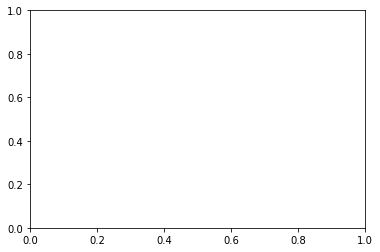

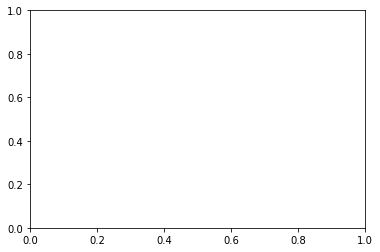

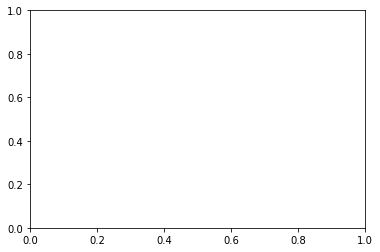

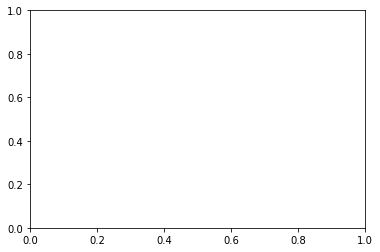

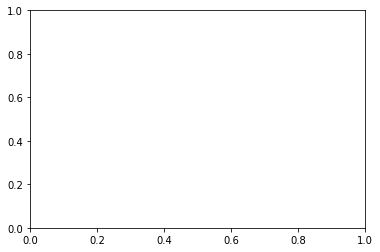

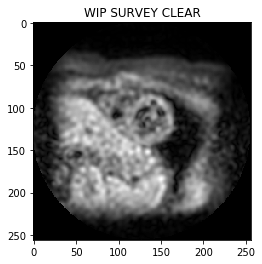

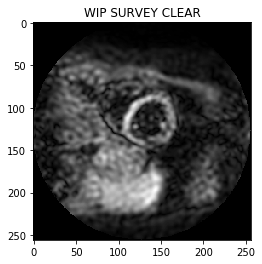

._IMG-0001-00039.dcm
._IMG-0001-00021.dcm
._IMG-0001-00035.dcm
._IMG-0001-00056.dcm
._IMG-0001-00027.dcm
._IMG-0001-00025.dcm
._IMG-0001-00033.dcm
._IMG-0001-00013.dcm
._IMG-0003-00008.dcm
._IMG-0004-00017.dcm
._IMG-0002-00002.dcm


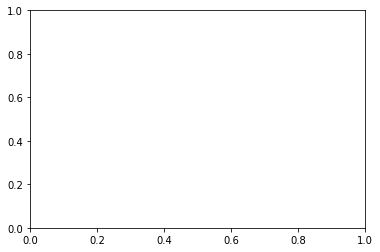

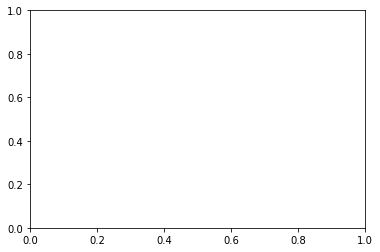

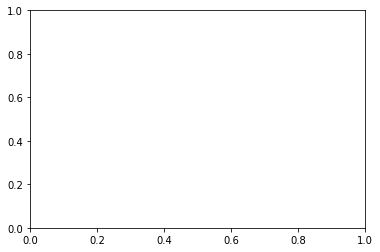

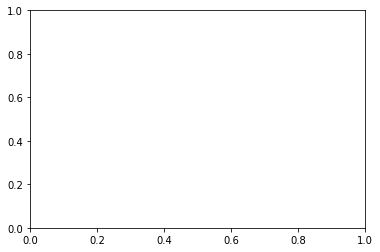

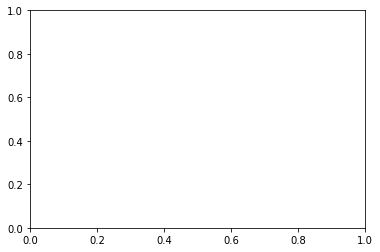

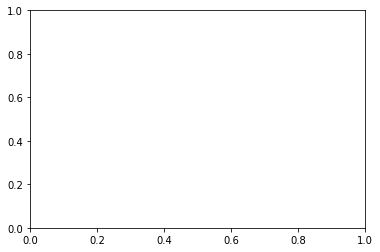

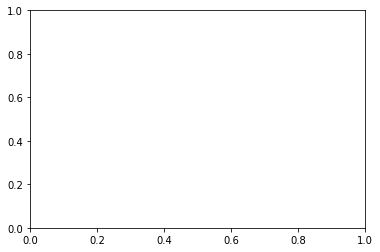

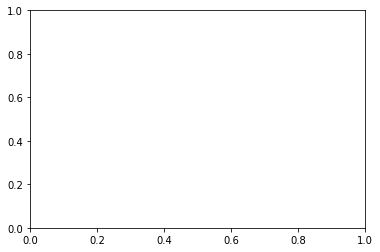

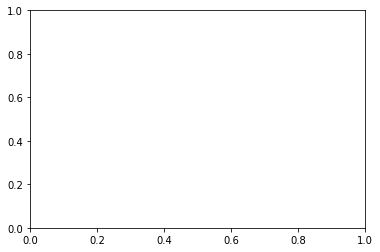

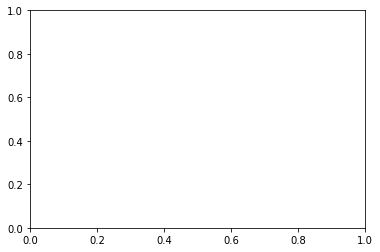

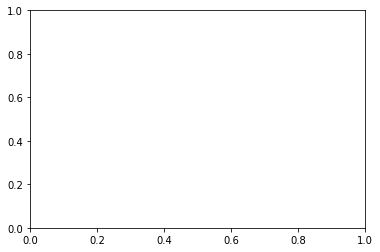

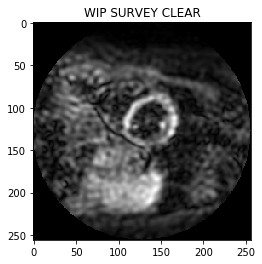

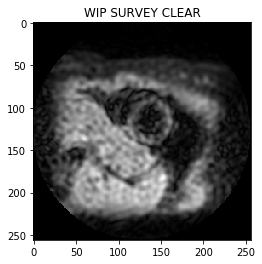

._IMG-0002-00020.dcm
._IMG-0001-00042.dcm
._IMG-0001-00040.dcm
._IMG-0001-00009.dcm


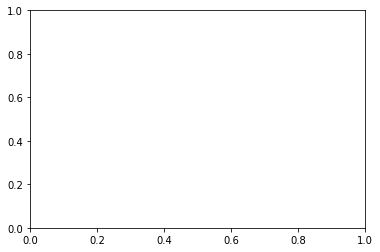

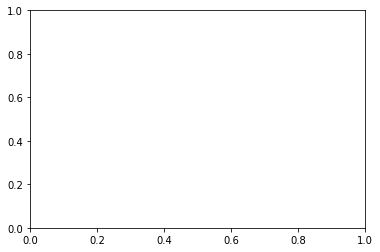

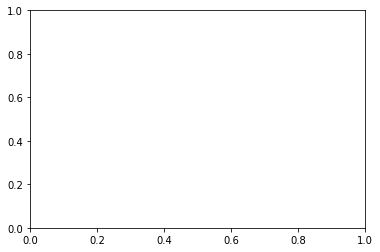

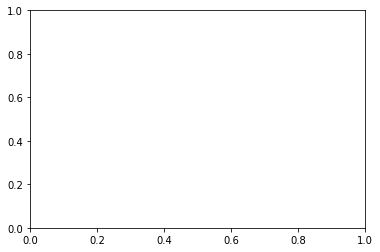

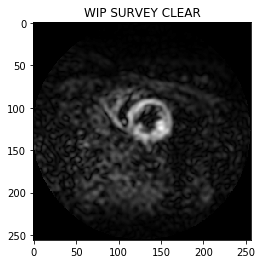

._IMG-0003-00001.dcm


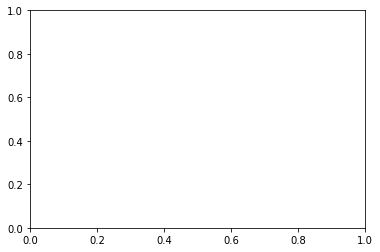

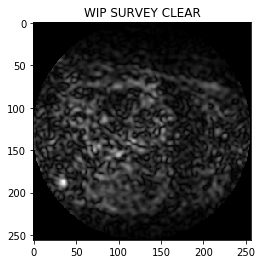

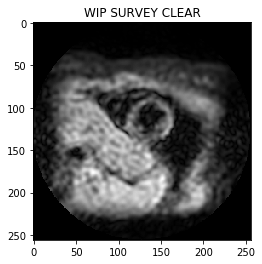

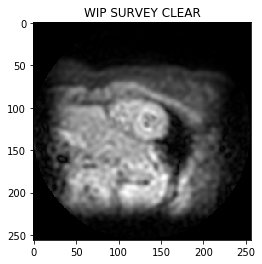

._IMG-0003-00011.dcm


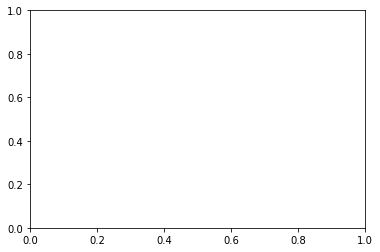

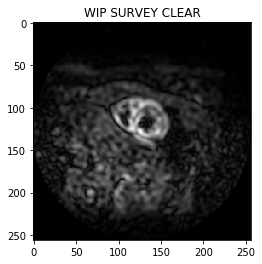

._IMG-0002-00013.dcm


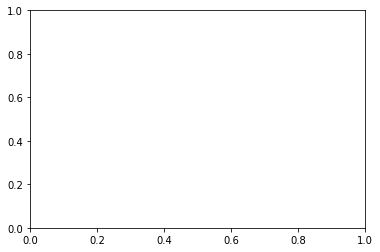

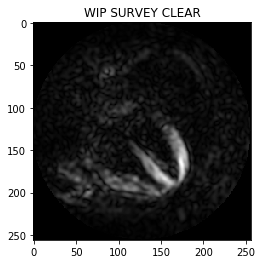

._IMG-0002-00014.dcm
._IMG-0001-00059.dcm


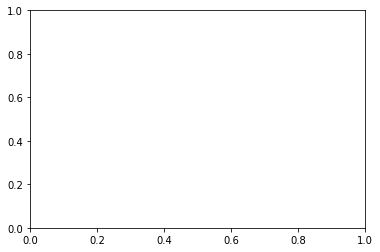

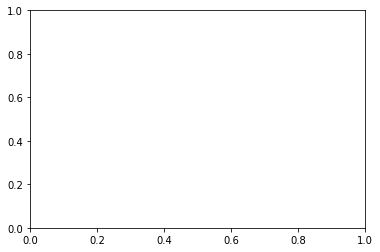

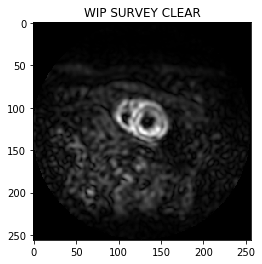

._IMG-0002-00007.dcm


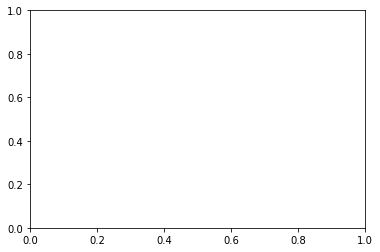

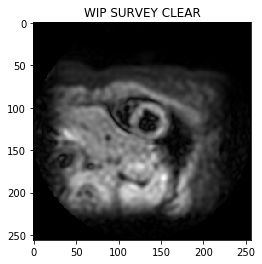

._IMG-0001-00026.dcm


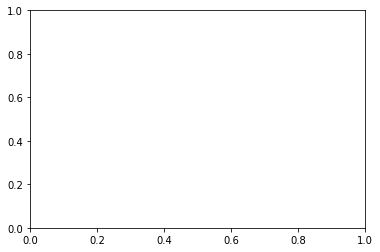

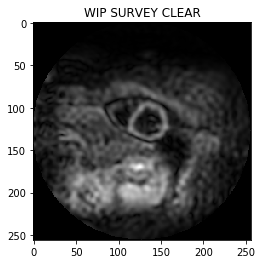

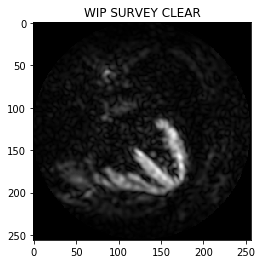

._IMG-0001-00028.dcm


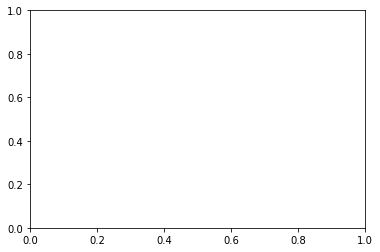

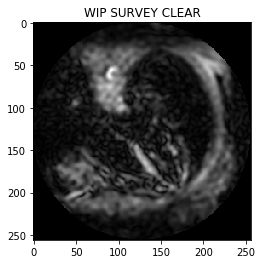

._IMG-0001-00010.dcm
._IMG-0001-00044.dcm
._IMG-0003-00009.dcm


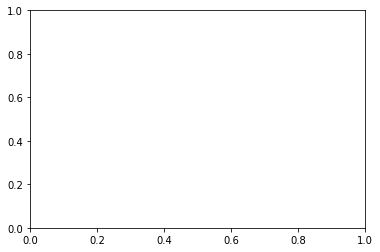

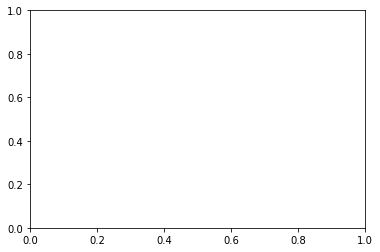

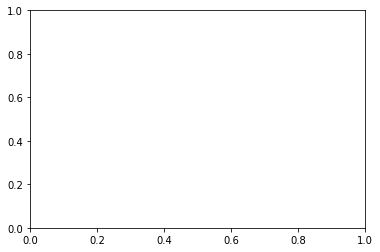

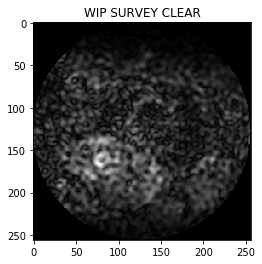

._IMG-0001-00004.dcm


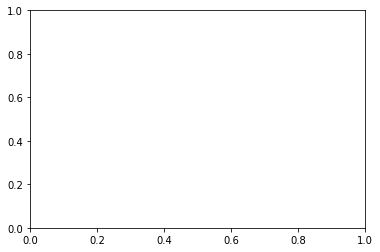

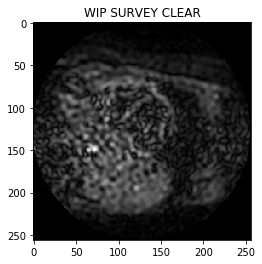

._IMG-0001-00034.dcm
._IMG-0002-00006.dcm
._IMG-0001-00024.dcm
._IMG-0003-00013.dcm
._IMG-0001-00058.dcm


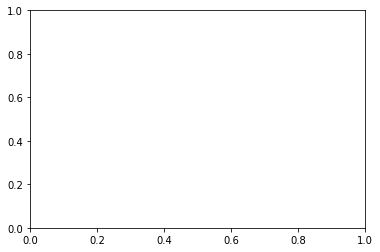

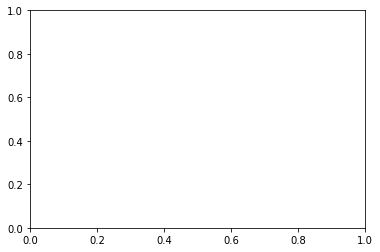

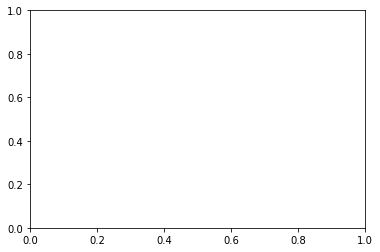

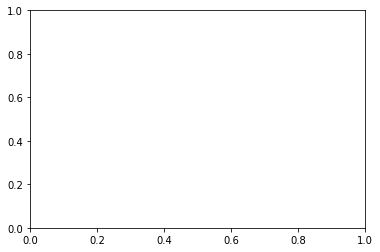

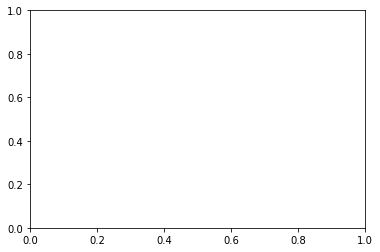

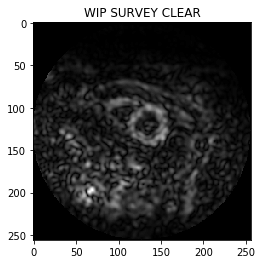

._IMG-0001-00002.dcm
._IMG-0004-00015.dcm
._IMG-0004-00008.dcm
._IMG-0002-00011.dcm
._IMG-0001-00050.dcm
._IMG-0001-00038.dcm


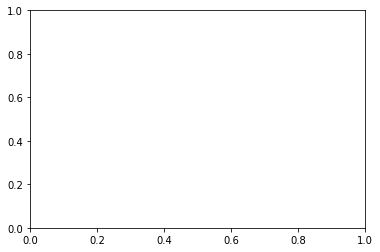

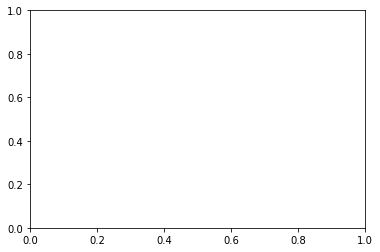

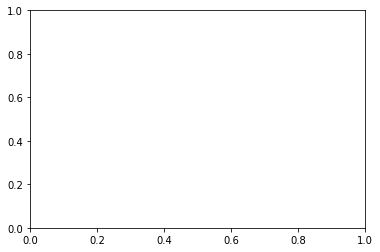

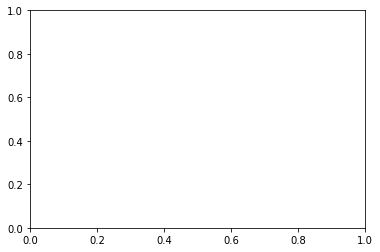

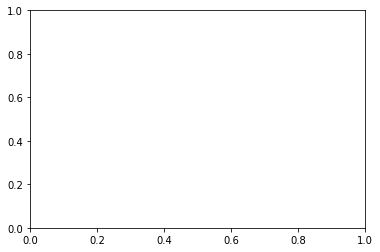

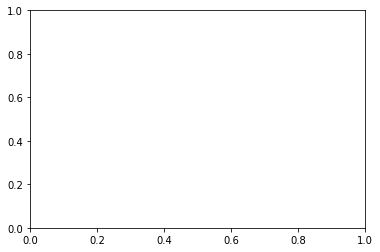

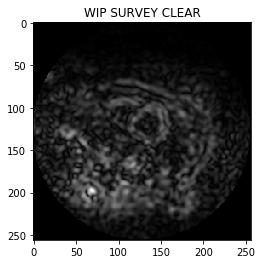

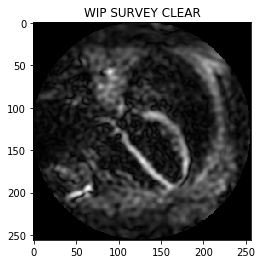

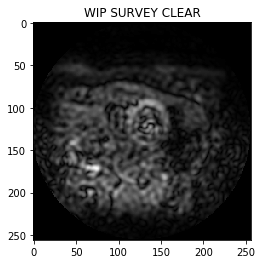

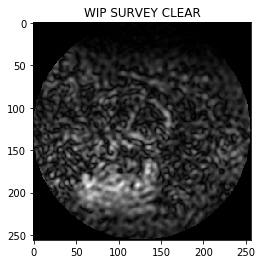

._IMG-0002-00001.dcm
._IMG-0003-00016.dcm


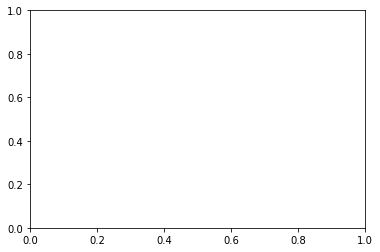

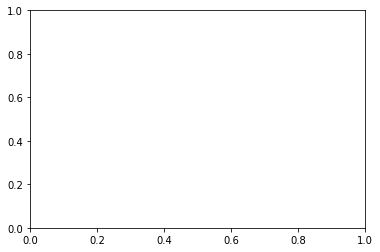

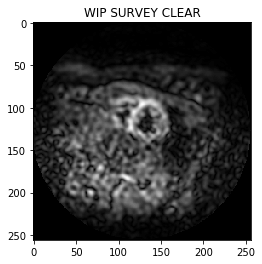

._IMG-0001-00032.dcm
._IMG-0001-00003.dcm


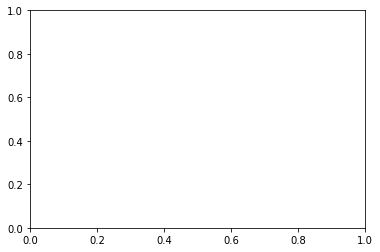

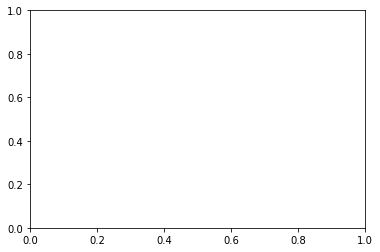

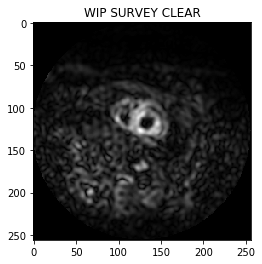

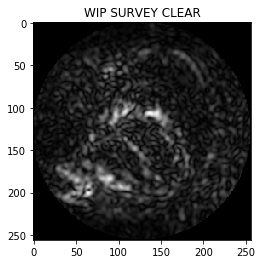

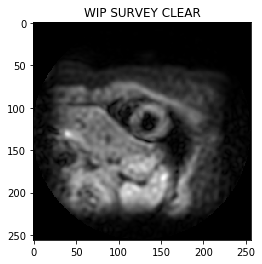

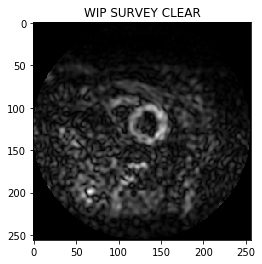

._IMG-0001-00007.dcm
._IMG-0001-00019.dcm


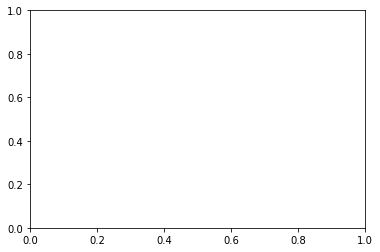

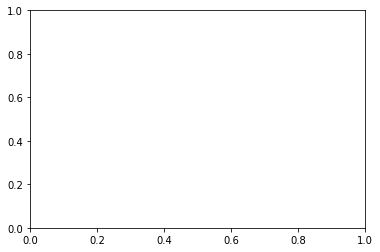

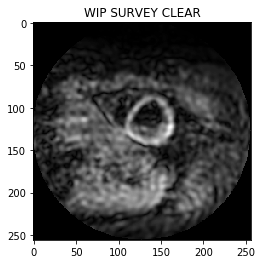

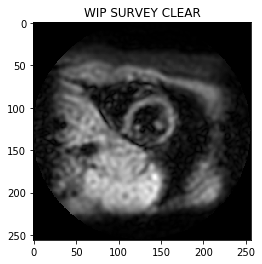

._IMG-0002-00018.dcm
._IMG-0001-00049.dcm


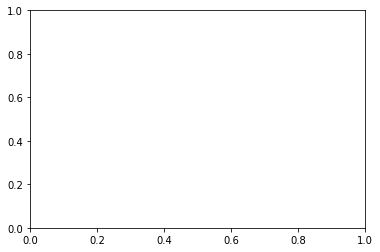

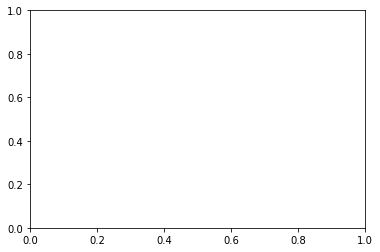

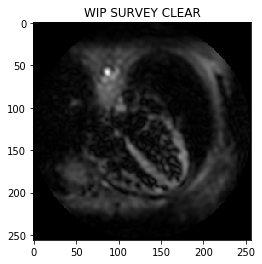

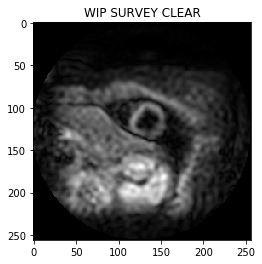

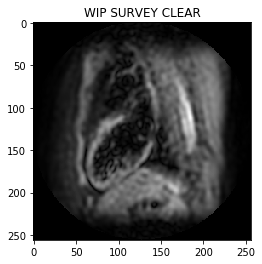

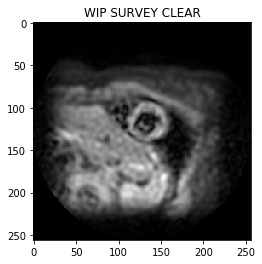

._IMG-0001-00051.dcm
._IMG-0003-00003.dcm
._IMG-0002-00010.dcm
._IMG-0003-00014.dcm


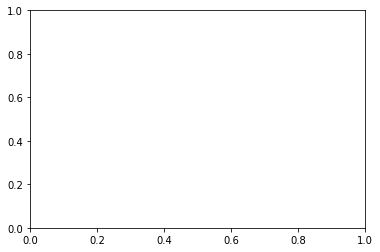

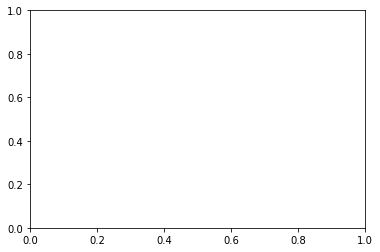

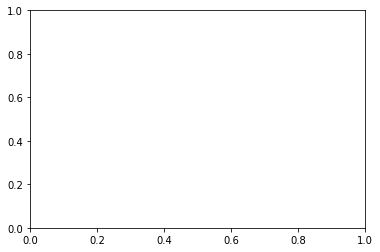

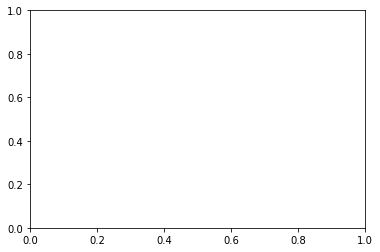

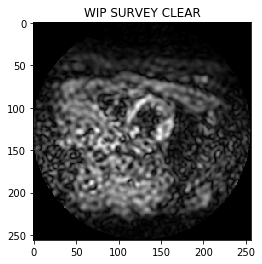

._IMG-0002-00016.dcm
._IMG-0001-00006.dcm
._IMG-0001-00060.dcm


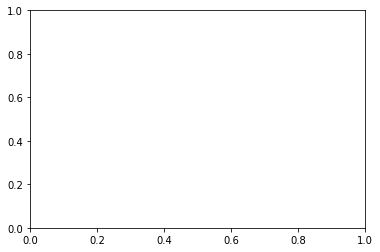

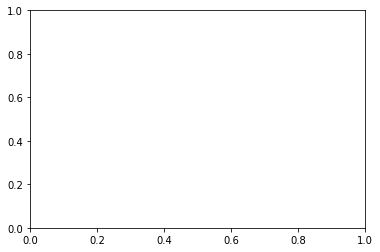

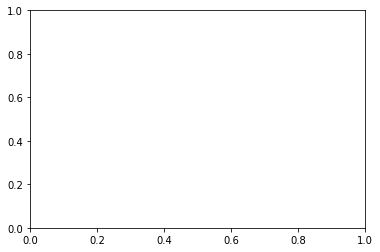

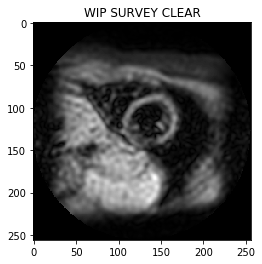

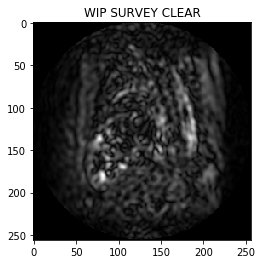

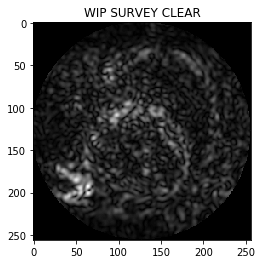

._IMG-0004-00003.dcm
._IMG-0004-00014.dcm
._IMG-0001-00001.dcm
._IMG-0001-00020.dcm
._IMG-0001-00055.dcm


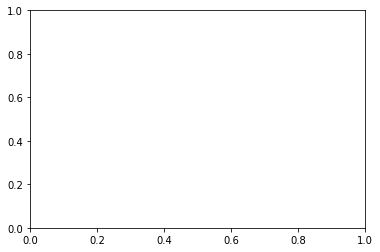

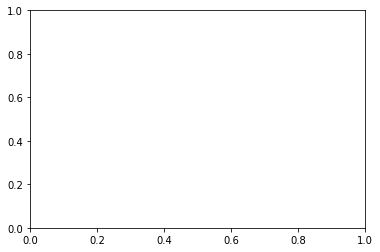

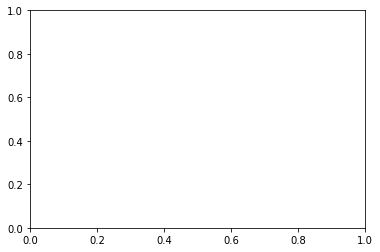

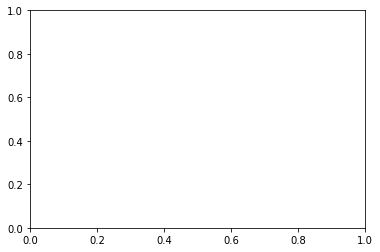

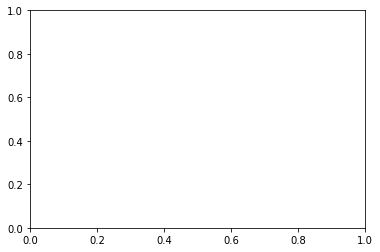

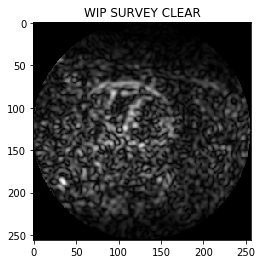

._IMG-0004-00013.dcm


{('WIP SURVEY CLEAR', 'Philips Medical Systems')}

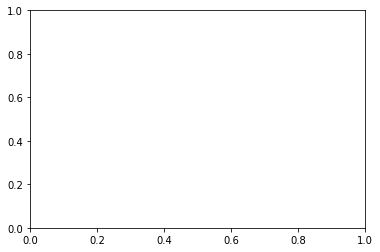

In [107]:
root = '/home/minaessam/Documents/dicom_test/validation Datasets/FTGoe_04(Healthy)'
sem_protos = set()
for file in os.listdir(root):
        fig = plt.figure()
        fig.add_subplot(1,1,1)
        try:
            image = dcm.read_file(os.path.join(root,file))
            sem_protos.add((image.ProtocolName,image.Manufacturer))
            plt.subplot(1,1,1)
            plt.imshow(image.pixel_array,cmap='gray')
            plt.title(image.ProtocolName)
            plt.show()
        except :
            print(file)
sem_protos

apical 1663 black
0
basal 1645 magenta
0
mid 1657 yellow
0


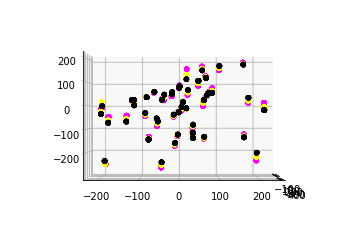

In [78]:
#print(len(lines.values()))
def normalize(arr):
    
    return (arr-np.mean(arr))/(np.std(arr)+1e-6)

fig = plt.figure()
ax = fig.gca(projection='3d')
for i,key in enumerate(lines.keys()):
    if i <3 :
        continue
    print(key,len(lines[key]),lines[key][0].color)
    x1= [line.position[0] for line in lines[key]]
    #x1= [line.point1[0] for line in lines[key]]
    #x1= np.array([math.degrees(math.acos(line.point1[0])) for line in lines[key]])
    x2= [line.point2[0] for line in lines[key]]
    #x2= np.array([math.degrees(math.acos(line.point2[0])) for line in lines[key]])
    y1 = [line.position[1] for line in lines[key]]
    #y1= [line.point1[1] for line in lines[key]]
    #y1= np.array([math.degrees(math.acos(line.point1[1])) for line in lines[key]])
    #y2= [line.point2[1] for line in lines[key]]
    #z1= [line.point1[2] for line in lines[key]]
    z0= np.array([line.point1[2] for line in lines[key]])
    z0 = normalize(z0)*100
    #z1= [math.degrees(math.acos(line.point1[2])) for line in lines[key]]
    z1= np.array([line.slice_location/100.0 for line in lines[key]])
    #z1 = [line.position[2] for line in lines[key]]
    z1 = normalize(z1)*100
    #z2= np.array([line.point2[2] for line in lines[key]])
    #z2 = normalize(z2)
    z3 = [ 1 if "siem" in line.manufac.lower()  else 0  for line in lines[key]  ]
    print(sum(z3))
    z4 = [line.distance for line in lines[key]]
    z4 = normalize(z4)*100
    #print(np.sum(z3))
    ax.scatter3D(z0,z1 ,z4, c=lines[key][0].color)
    ax.view_init(elev=0., azim=0)
    #ax.scatter3D(x2, y2, z2, c=lines[key][0].color)

In [ ]:
#show images of 20 patients


# Per patient

/home/minaessam/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
Expected sequence item with tag (fffe, e000) at file position 0x3f6


counter :  60


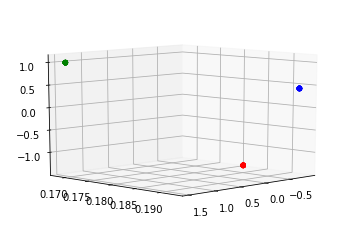

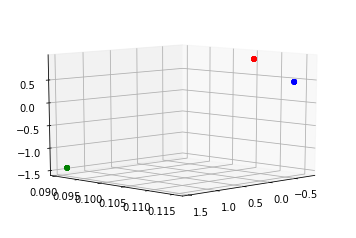

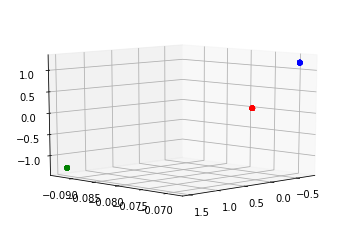

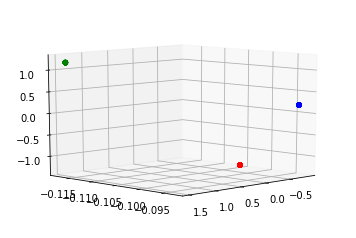

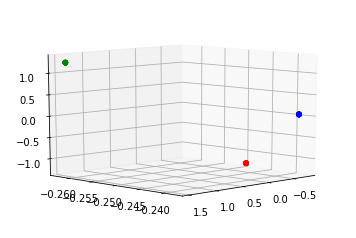

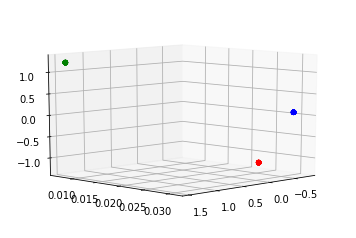

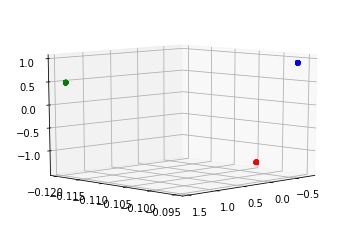

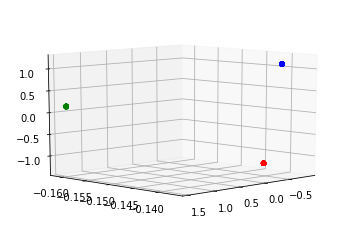

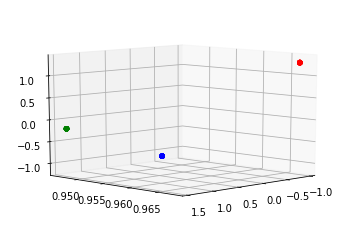

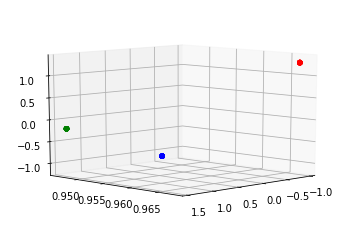

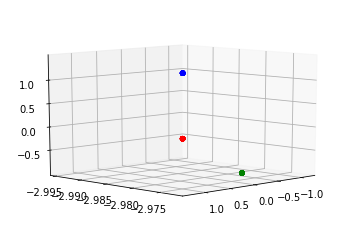

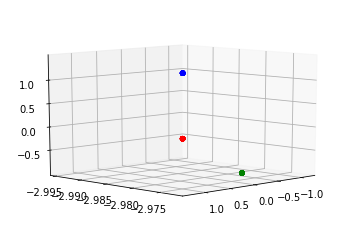

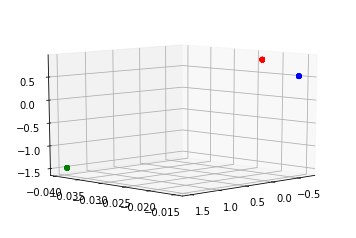

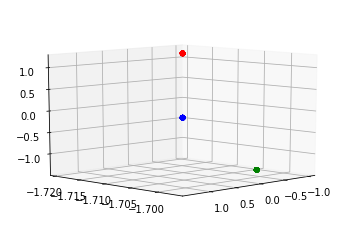

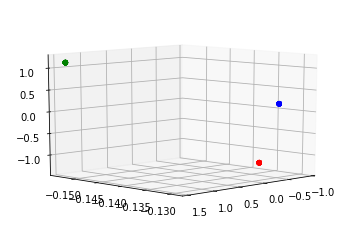

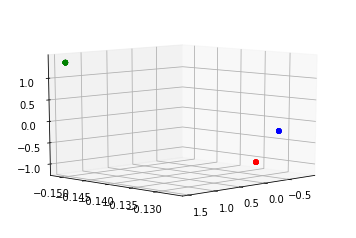

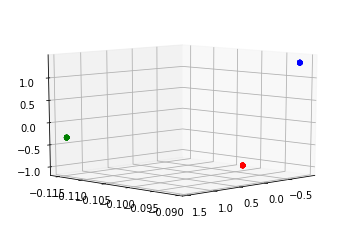

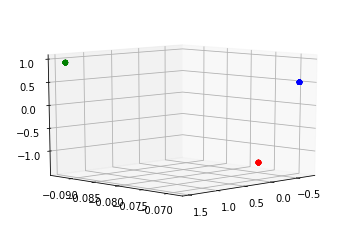

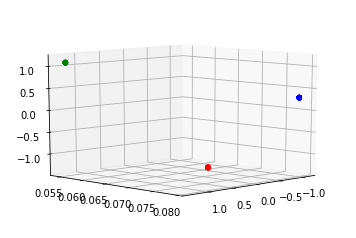

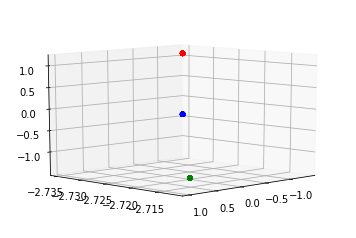

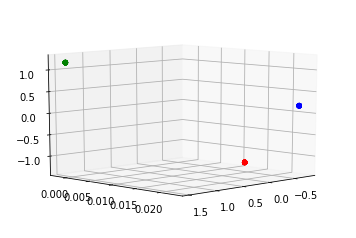

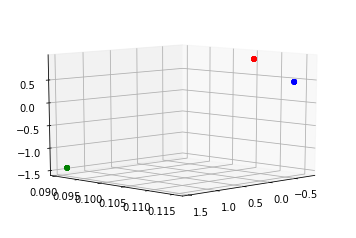

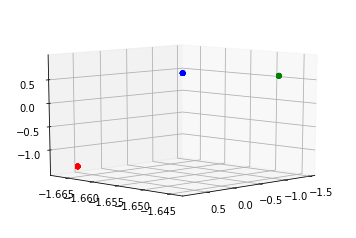

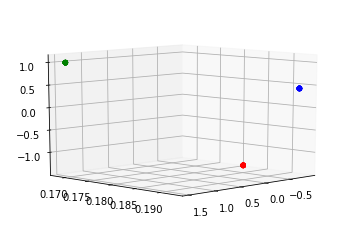

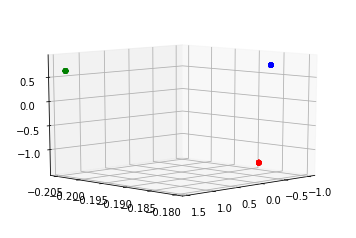

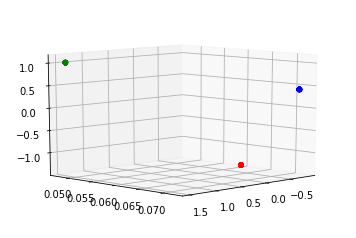

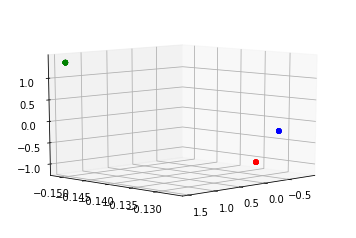

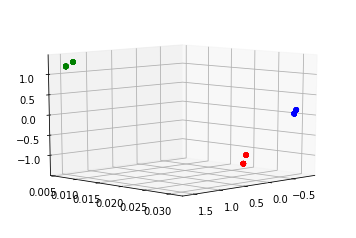

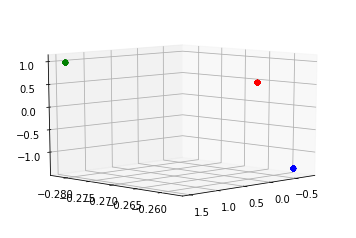

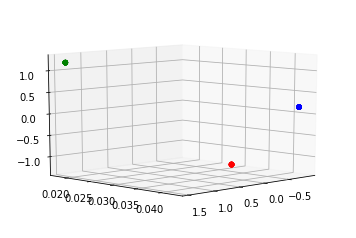

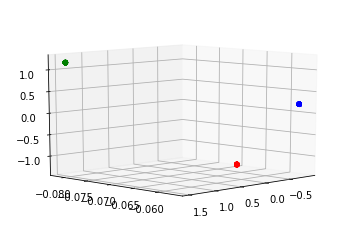

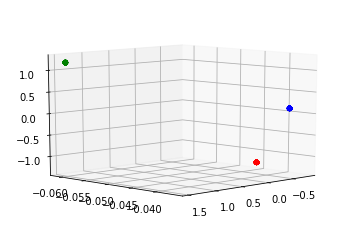

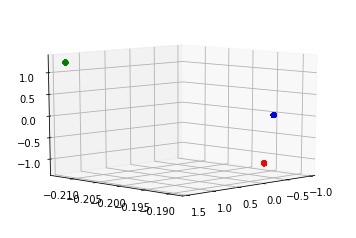

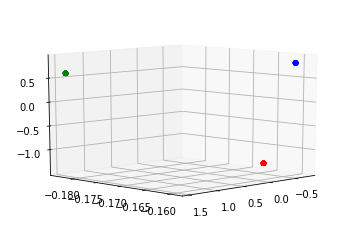

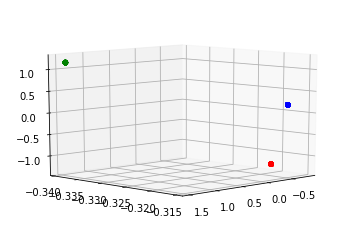

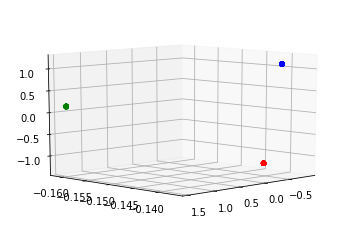

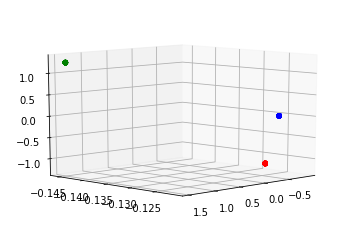

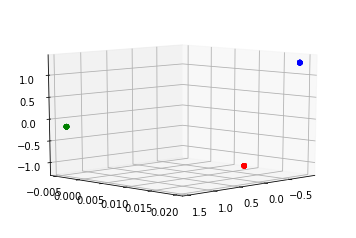

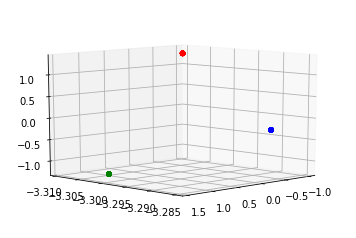

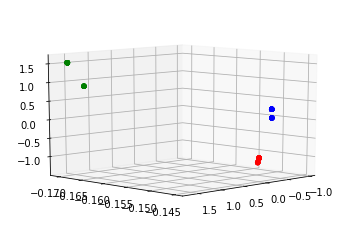

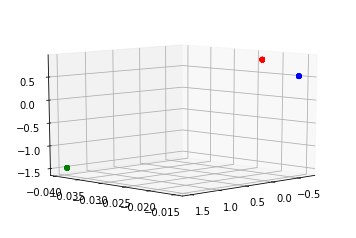

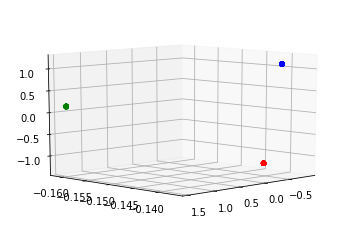

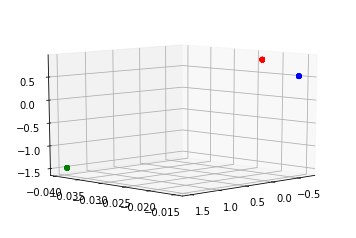

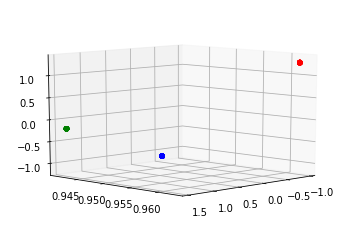

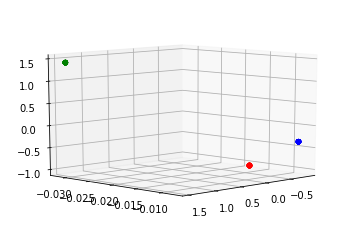

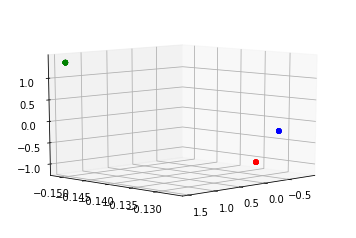

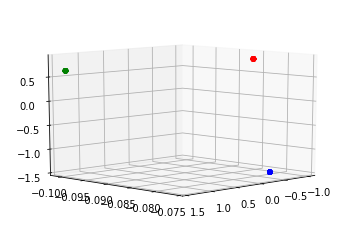

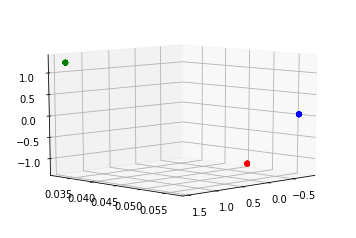

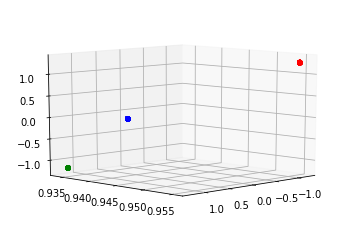

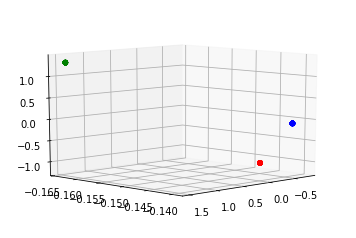

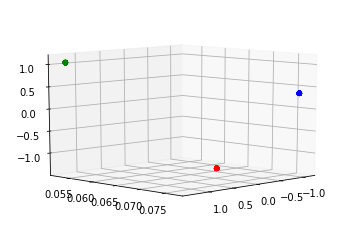

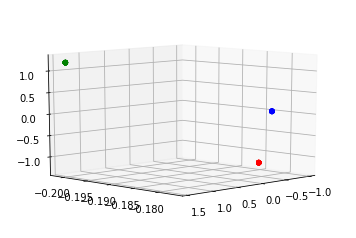

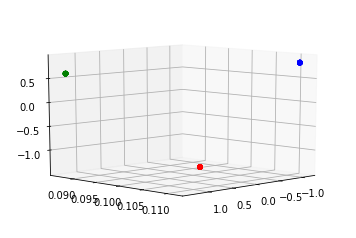

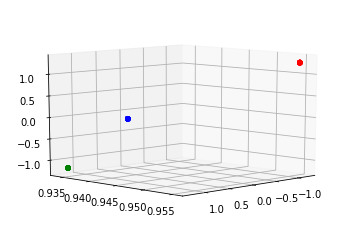

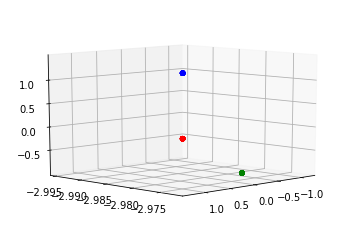

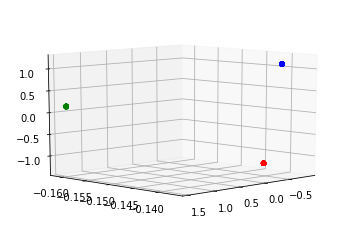

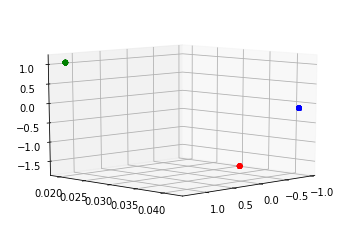

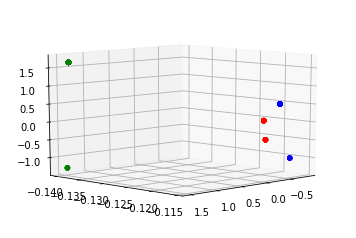

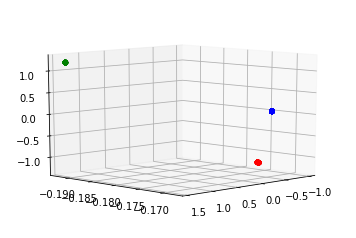

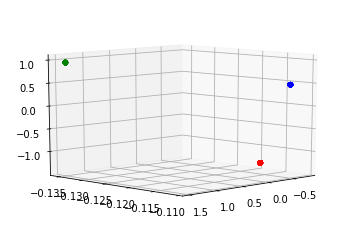

In [87]:
def normalize(arr):
    return (arr-np.mean(arr))/(np.std(arr)+1e-9)
def dist(positions):
    arr = np.array(positions)
    return np.sqrt(np.sum(arr**2))
    
paths = ['/home/minaessam/Documents/dicom_test/datasets_annotated_by_marina/',\
         '/home/minaessam/Documents/dicom_test/datasets-annotated by-mayar']
lines = {'2ch':[],
        '3ch':[],
        '4ch':[],
        'apical':[],
        'basal':[],
        'mid':[]}

counter = 0
for path in paths:
    for root,dirs,files in os.walk(path):
        
        lines = {'2ch':[],
        '3ch':[],
        '4ch':[],
        'apical':[],
        'basal':[],
        'mid':[]}
        #per patient
        error = False
        
        if(len(files) == 0):
             error = True
           
        for file in files:
            #print(file)
            if ".dcm" in file.lower() :
                try:
                    image = dcm.read_file(os.path.join(root,file),force= True)
                    sl_type = ''
                    for key in slices.keys():
                        
                        if key in file:
                            sl_type = slices[key]
                            break
                            
                    #print(sl_type)
                    if sl_type:
                        #print(file,sl_type)
                        lines[sl_type].append(Line(colors[sl_type],image.SliceLocation,image.Manufacturer,\
                                            dist(image.ImagePositionPatient),image.ProtocolName,\
                                                   image.ImagePositionPatient,*image.ImageOrientationPatient))
                        
                        
                        error = False
                    else :
                        error = True
                        #print(file)
                        break
                        
                except  :
                    
                    error = True
                    break
        
        
        for key in lines.keys():
            if len(lines[key]) == 0:
                error = True
                #print(key)
                break
        
        if error:
            continue
            
        counter +=1
        choose = ['2ch', '3ch', '4ch']
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.view_init(elev=10., azim=45)
        x1=  np.array([line.position[0] for key in lines.keys() \
                       for line in lines[key] if key in choose])
        x1_mean = np.mean(x1)
        x1_std = np.std(x1)
        y1=  np.array([line.position[1] for key in lines.keys()\
                       for line in lines[key] if key in choose ])
        y1_mean = np.mean(y1)
        y1_std = np.std(y1)
        
        z1=  [line.slice_location for key in lines.keys() \
              for line in lines[key] if key in choose]
        z1_mean = np.mean(z1)
        z1_std = np.std(z1)
        
        z4 = [line.distance for key in lines.keys() \
              for line in lines[key] if key in choose]
        z4_mean = np.mean(z4)
        z4_std = np.std(z4)
        #print(len(x1),len(y1),len(z4))
        #print(x1,y1,z4,sep='\n')
        #ax.scatter3D(x1 ,y1 ,z4, c=lines[key][0].color)
        for i,key in enumerate(lines.keys()):
            if i> 2:
                continue
            #x1=  np.array([line.position[0] for line in lines[key]])
            
            #x1 = normalize(x1)*100
            x1= [line.position[0] for line in lines[key]]
            #x1= np.array([math.degrees(math.acos(line.point1[0])) for line in lines[key]])
            x1 = (x1-x1_mean)/x1_std
            x2= [line.position[0] for line in lines[key]]
            x2 = normalize(x2)*100
            #x2= np.array([math.degrees(math.acos(line.point2[0])) for line in lines[key]])
            #y1 = [line.position[1] for line in lines[key]]
            
            #y1 = normalize(y1)*100
            y1= [line.position[1] for line in lines[key]]
            y1 = (y1-y1_mean)/ y1_std
            #y1= np.array([math.degrees(math.acos(line.point1[1])) for line in lines[key]])
            #y2= [line.point2[1] for line in lines[key]]
            #z1= [line.point1[2] for line in lines[key]]
            z1= np.array([line.slice_location for line in lines[key]])
            #z0 = normalize(z0)*100
            #z1= [math.degrees(math.acos(line.point1[2])) for line in lines[key]]
            z1= np.array([line.slice_location/100.0 for line in lines[key]])
            z1 = (z1-z1_mean) / z1_std
            #z1 = [line.position[2] for line in lines[key]]
            #z1 = (z1-np.mean(z1))
            #z2= np.array([line.point2[2] for line in lines[key]])
            #z2 = normalize(z2)
            z3 = [ 0 if "sie" in line.manufac.lower()  else 1  for line in lines[key]  ]
            #print(sum(z3))
            z4 = [line.distance for line in lines[key]]
            z4 = (z4-z4_mean)/ z4_std
            #z4 = (z4-np.mean(z4))
            #print(np.sum(z3))
            ax.scatter3D(x1,z1 ,z4, c=lines[key][0].color)
              

print("counter : ",counter)

{('WIP SURVEY CLEAR', '2ch'), ('WIP SURVEY CLEAR', '4ch'), ('WIP SURVEY CLEAR', 'basal'), ('WIP SURVEY CLEAR', '3ch'), ('WIP SURVEY CLEAR', 'apical'), ('WIP SURVEY CLEAR', 'mid')}
{('WIP SURVEY CLEAR', '2ch'), ('WIP SURVEY CLEAR', '4ch'), ('WIP SURVEY CLEAR', 'basal'), ('WIP SURVEY CLEAR', '3ch'), ('WIP SURVEY CLEAR', 'apical'), ('WIP SURVEY CLEAR', 'mid')}
{('WIP SURVEY CLEAR', '2ch'), ('WIP SURVEY CLEAR', '4ch'), ('WIP SURVEY CLEAR', 'basal'), ('WIP SURVEY CLEAR', '3ch'), ('WIP SURVEY CLEAR', 'apical'), ('WIP SURVEY CLEAR', 'mid')}
{('WIP SURVEY CLEAR', '2ch'), ('WIP SURVEY CLEAR', '4ch'), ('WIP SURVEY CLEAR', 'basal'), ('WIP SURVEY CLEAR', '3ch'), ('WIP SURVEY CLEAR', 'apical'), ('WIP SURVEY CLEAR', 'mid')}
{('WIP SURVEY CLEAR', '2ch'), ('WIP SURVEY CLEAR', '4ch'), ('WIP SURVEY CLEAR', 'basal'), ('WIP SURVEY CLEAR', '3ch'), ('WIP SURVEY CLEAR', 'apical'), ('WIP SURVEY CLEAR', 'mid')}
{('WIP SURVEY CLEAR', '2ch'), ('WIP SURVEY CLEAR', '4ch'), ('WIP SURVEY CLEAR', 'basal'), ('WIP SURV

{('WIP SURVEY CLEAR', '4ch'), ('WIP fSENC D10 SA 3sl CLEAR', 'mid'), ('WIP fSENC rec 4ch CLEAR', '4ch'), ('WIP fSENC rest 2ch CLEAR', '2ch'), ('WIP fSENC D20 SA 3sl CLEAR', 'apical'), ('WIP fSENC D20 SA 3sl CLEAR', 'basal'), ('WIP fSENC D10 SA 3sl CLEAR', 'apical'), ('WIP fSENC D20 SA 3sl CLEAR', 'mid'), ('WIP fSENC rest 3ch CLEAR', '3ch'), ('WIP fSENC rec 3ch CLEAR', '3ch'), ('WIP SURVEY CLEAR', '3ch'), ('WIP fSENC D10 2ch CLEAR', '2ch'), ('WIP fSENC D10 4ch CLEAR', '4ch'), ('WIP fSENC D20 4ch CLEAR', '4ch'), ('WIP fSENC rec 2ch CLEAR', '2ch'), ('WIP SURVEY CLEAR', '2ch'), ('WIP fSENC D10 3ch CLEAR', '3ch'), ('WIP fSENC D20 2ch CLEAR', '2ch'), ('WIP fSENC rest 4ch CLEAR', '4ch'), ('WIP fSENC rec SA 3sl CLEAR', 'mid'), ('WIP fSENC D20 3ch CLEAR', '3ch'), ('WIP fSENC rec SA 3sl CLEAR', 'apical'), ('WIP fSENC rec SA 3sl CLEAR', 'basal'), ('WIP fSENC D10 SA 3sl CLEAR', 'basal'), ('WIP SURVEY CLEAR', 'basal'), ('WIP fSENC rest SA 3sl CLEAR', 'basal'), ('WIP SURVEY CLEAR', 'apical'), ('WIP 

/home/minaessam/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


{('WIP SURVEY CLEAR', '4ch'), ('WIP fSENC D10 SA 3sl CLEAR', 'mid'), ('WIP fSENC rec 4ch CLEAR', '4ch'), ('WIP fSENC rest 2ch CLEAR', '2ch'), ('WIP fSENC D20 SA 3sl CLEAR', 'apical'), ('WIP fSENC D20 SA 3sl CLEAR', 'basal'), ('WIP fSENC D10 SA 3sl CLEAR', 'apical'), ('WIP fSENC D20 SA 3sl CLEAR', 'mid'), ('WIP fSENC rest 3ch CLEAR', '3ch'), ('WIP fSENC rec 3ch CLEAR', '3ch'), ('WIP SURVEY CLEAR', '3ch'), ('WIP fSENC D10 2ch CLEAR', '2ch'), ('WIP fSENC D10 4ch CLEAR', '4ch'), ('WIP fSENC D20 4ch CLEAR', '4ch'), ('WIP fSENC rec 2ch CLEAR', '2ch'), ('WIP SURVEY CLEAR', '2ch'), ('WIP fSENC D10 3ch CLEAR', '3ch'), ('WIP fSENC D20 2ch CLEAR', '2ch'), ('WIP fSENC rest 4ch CLEAR', '4ch'), ('WIP fSENC rec SA 3sl CLEAR', 'mid'), ('WIP fSENC D20 3ch CLEAR', '3ch'), ('WIP fSENC rec SA 3sl CLEAR', 'apical'), ('WIP fSENC rec SA 3sl CLEAR', 'basal'), ('WIP fSENC D10 SA 3sl CLEAR', 'basal'), ('WIP SURVEY CLEAR', 'basal'), ('WIP fSENC rest SA 3sl CLEAR', 'basal'), ('WIP SURVEY CLEAR', 'apical'), ('WIP 

{('WIP SURVEY CLEAR', '4ch'), ('WIP fSENC D10 SA 3sl CLEAR', 'mid'), ('WIP fSENC rest 2ch CLEAR', '2ch'), ('WIP fSENC D20 SA 3sl CLEAR', 'apical'), ('WIP fSENC D20 SA 3sl CLEAR', 'basal'), ('WIP fSENC D10 SA 3sl CLEAR', 'apical'), ('WIP fSENC D20 SA 3sl CLEAR', 'mid'), ('WIP fSENC rest 3ch CLEAR', '3ch'), ('WIP SURVEY CLEAR', '3ch'), ('WIP fSENC D10 2ch CLEAR', '2ch'), ('WIP fSENC D10 4ch CLEAR', '4ch'), ('WIP fSENC D20 4ch CLEAR', '4ch'), ('WIP SURVEY CLEAR', '2ch'), ('WIP fSENC D10 3ch CLEAR', '3ch'), ('WIP fSENC rest 4ch CLEAR', '4ch'), ('WIP fSENC D20 2ch CLEAR', '2ch'), ('WIP fSENC D20 3ch CLEAR', '3ch'), ('WIP fSENC D10 SA 3sl CLEAR', 'basal'), ('WIP SURVEY CLEAR', 'basal'), ('WIP fSENC rest SA 3sl CLEAR', 'basal'), ('WIP SURVEY CLEAR', 'apical'), ('WIP fSENC rest SA 3sl CLEAR', 'mid'), ('WIP SURVEY CLEAR', 'mid'), ('WIP fSENC rest SA 3sl CLEAR', 'apical')}
{('WIP SURVEY CLEAR', '4ch'), ('WIP fSENC D10 SA 3sl CLEAR', 'mid'), ('WIP fSENC rest 2ch CLEAR', '2ch'), ('WIP fSENC D20 SA

{('WIP SURVEY CLEAR', '4ch'), ('WIP fSENC D10 SA 3sl CLEAR', 'mid'), ('WIP fSENC rest 2ch CLEAR', '2ch'), ('WIP fSENC D20 SA 3sl CLEAR', 'apical'), ('WIP fSENC D20 SA 3sl CLEAR', 'basal'), ('WIP fSENC D10 SA 3sl CLEAR', 'apical'), ('WIP fSENC D20 SA 3sl CLEAR', 'mid'), ('WIP fSENC rest 3ch CLEAR', '3ch'), ('WIP SURVEY CLEAR', '3ch'), ('WIP fSENC D10 2ch CLEAR', '2ch'), ('WIP fSENC D10 4ch CLEAR', '4ch'), ('WIP fSENC D20 4ch CLEAR', '4ch'), ('WIP SURVEY CLEAR', '2ch'), ('WIP fSENC D10 3ch CLEAR', '3ch'), ('WIP fSENC rest 4ch CLEAR', '4ch'), ('WIP fSENC D20 2ch CLEAR', '2ch'), ('WIP fSENC D20 3ch CLEAR', '3ch'), ('WIP fSENC D10 SA 3sl CLEAR', 'basal'), ('WIP SURVEY CLEAR', 'basal'), ('WIP fSENC rest SA 3sl CLEAR', 'basal'), ('WIP SURVEY CLEAR', 'apical'), ('WIP fSENC rest SA 3sl CLEAR', 'mid'), ('WIP SURVEY CLEAR', 'mid'), ('WIP fSENC rest SA 3sl CLEAR', 'apical')}
{('WIP SURVEY CLEAR', '4ch'), ('WIP fSENC D10 SA 3sl CLEAR', 'mid'), ('WIP fSENC rest 2ch CLEAR', '2ch'), ('WIP fSENC D20 SA

Expected sequence item with tag (fffe, e000) at file position 0x3f6


{('WIP SURVEY CLEAR', '4ch'), ('WIP fSENC D10 SA 3sl CLEAR', 'mid'), ('WIP fSENC rest 2ch CLEAR', '2ch'), ('WIP fSENC D20 SA 3sl CLEAR', 'apical'), ('WIP fSENC D20 SA 3sl CLEAR', 'basal'), ('WIP fSENC D10 SA 3sl CLEAR', 'apical'), ('WIP fSENC D20 SA 3sl CLEAR', 'mid'), ('WIP fSENC rest 3ch CLEAR', '3ch'), ('WIP SURVEY CLEAR', '3ch'), ('WIP fSENC D10 2ch CLEAR', '2ch'), ('WIP fSENC D10 4ch CLEAR', '4ch'), ('WIP fSENC D20 4ch CLEAR', '4ch'), ('WIP SURVEY CLEAR', '2ch'), ('WIP fSENC D10 3ch CLEAR', '3ch'), ('WIP fSENC rest 4ch CLEAR', '4ch'), ('WIP fSENC D20 2ch CLEAR', '2ch'), ('WIP fSENC D20 3ch CLEAR', '3ch'), ('WIP fSENC D10 SA 3sl CLEAR', 'basal'), ('WIP SURVEY CLEAR', 'basal'), ('WIP fSENC rest SA 3sl CLEAR', 'basal'), ('WIP SURVEY CLEAR', 'apical'), ('WIP fSENC rest SA 3sl CLEAR', 'mid'), ('WIP SURVEY CLEAR', 'mid'), ('WIP fSENC rest SA 3sl CLEAR', 'apical')}
{('WIP SURVEY CLEAR', '4ch'), ('WIP fSENC D10 SA 3sl CLEAR', 'mid'), ('WIP fSENC rest 2ch CLEAR', '2ch'), ('WIP fSENC D20 SA

{('WIP SURVEY CLEAR', '4ch'), ('WIP fSENC D10 SA 3sl CLEAR', 'mid'), ('WIP fSENC rest 2ch CLEAR', '2ch'), ('WIP fSENC D20 SA 3sl CLEAR', 'apical'), ('WIP fSENC D20 SA 3sl CLEAR', 'basal'), ('WIP fSENC 3ch rest CLEAR', '3ch'), ('WIP fSENC D10 SA 3sl CLEAR', 'apical'), ('WIP fSENC D20 SA 3sl CLEAR', 'mid'), ('WIP fSENC rest 3ch CLEAR', '3ch'), ('WIP SURVEY CLEAR', '3ch'), ('WIP fSENC D10 2ch CLEAR', '2ch'), ('WIP fSENC SA 3SL rest CLEAR', 'apical'), ('WIP fSENC D10 4ch CLEAR', '4ch'), ('WIP fSENC D20 4ch CLEAR', '4ch'), ('WIP fSENC 4ch rest CLEAR', '4ch'), ('WIP SURVEY CLEAR', '2ch'), ('WIP fSENC D10 3ch CLEAR', '3ch'), ('WIP fSENC rest 4ch CLEAR', '4ch'), ('WIP fSENC D20 2ch CLEAR', '2ch'), ('WIP fSENC SA 3SL rest CLEAR', 'mid'), ('WIP fSENC D20 3ch CLEAR', '3ch'), ('WIP fSENC 2ch rest CLEAR', '2ch'), ('WIP fSENC D10 SA 3sl CLEAR', 'basal'), ('WIP fSENC SA 3SL rest CLEAR', 'basal'), ('WIP SURVEY CLEAR', 'basal'), ('WIP fSENC rest SA 3sl CLEAR', 'basal'), ('WIP SURVEY CLEAR', 'apical'), 

{('WIP SURVEY CLEAR', '2ch'),
 ('WIP SURVEY CLEAR', '3ch'),
 ('WIP SURVEY CLEAR', '4ch'),
 ('WIP SURVEY CLEAR', 'apical'),
 ('WIP SURVEY CLEAR', 'basal'),
 ('WIP SURVEY CLEAR', 'mid'),
 ('WIP fSENC 2ch D 20 CLEAR', '2ch'),
 ('WIP fSENC 2ch rest CLEAR', '2ch'),
 ('WIP fSENC 3ch D 20 CLEAR', '3ch'),
 ('WIP fSENC 3ch rest CLEAR', '3ch'),
 ('WIP fSENC 4ch D 20 CLEAR', '4ch'),
 ('WIP fSENC 4ch rest CLEAR', '4ch'),
 ('WIP fSENC D10 2ch CLEAR', '2ch'),
 ('WIP fSENC D10 3ch CLEAR', '3ch'),
 ('WIP fSENC D10 4ch CLEAR', '4ch'),
 ('WIP fSENC D10 SA 3sl CLEAR', 'apical'),
 ('WIP fSENC D10 SA 3sl CLEAR', 'basal'),
 ('WIP fSENC D10 SA 3sl CLEAR', 'mid'),
 ('WIP fSENC D20 2ch CLEAR', '2ch'),
 ('WIP fSENC D20 3ch CLEAR', '3ch'),
 ('WIP fSENC D20 4ch CLEAR', '4ch'),
 ('WIP fSENC D20 SA 3sl CLEAR', 'apical'),
 ('WIP fSENC D20 SA 3sl CLEAR', 'basal'),
 ('WIP fSENC D20 SA 3sl CLEAR', 'mid'),
 ('WIP fSENC SA 3SL D 20 CLEAR', 'apical'),
 ('WIP fSENC SA 3SL D 20 CLEAR', 'basal'),
 ('WIP fSENC SA 3SL D 20 CLE

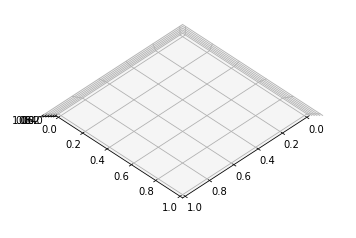

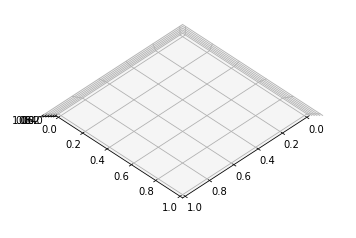

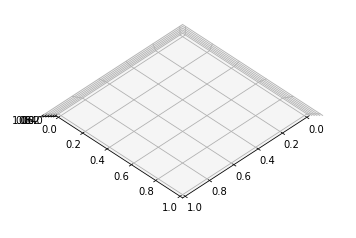

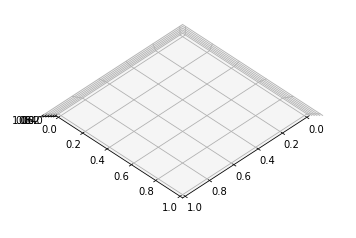

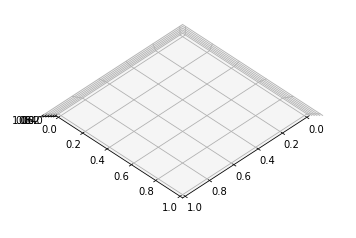

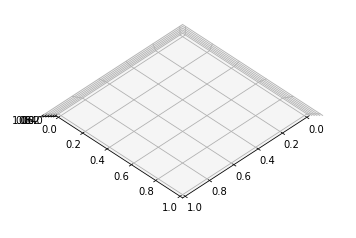

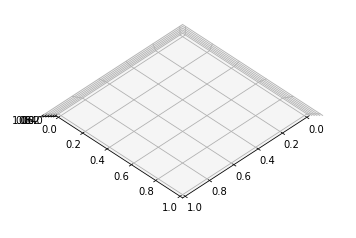

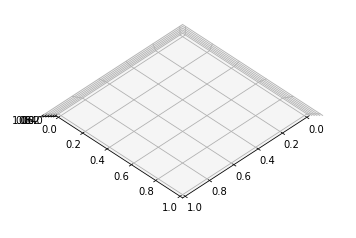

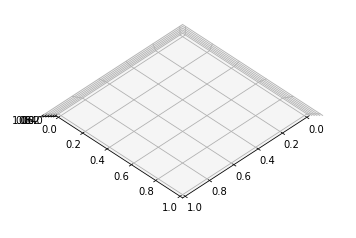

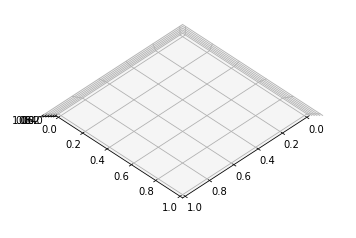

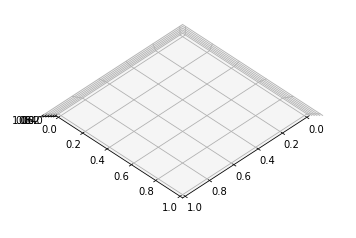

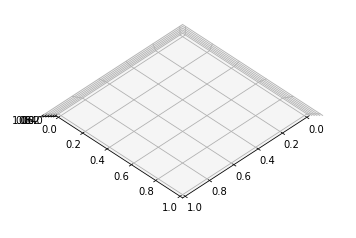

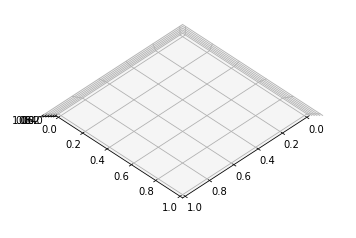

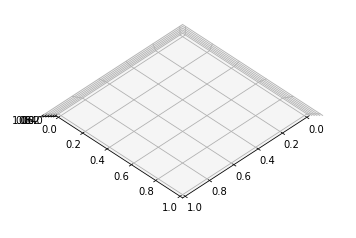

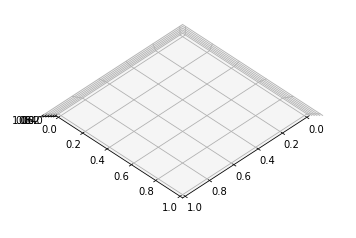

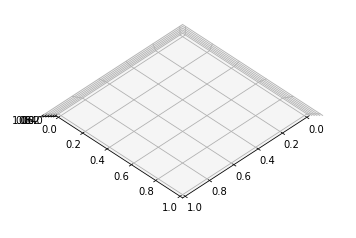

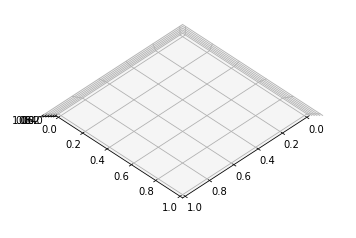

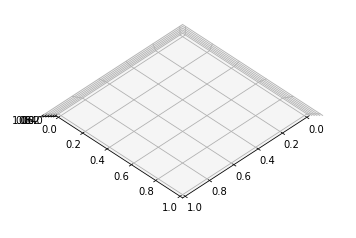

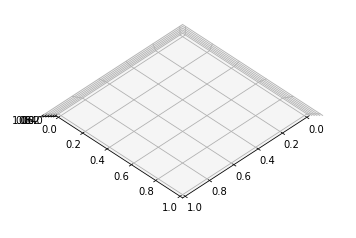

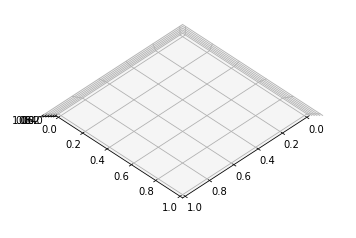

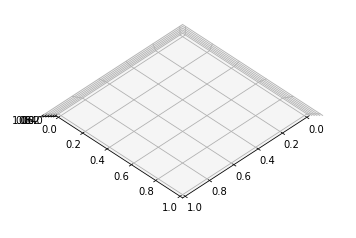

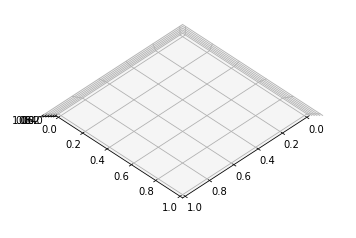

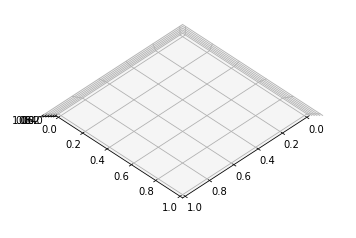

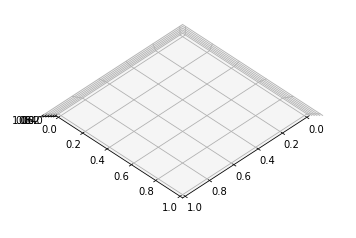

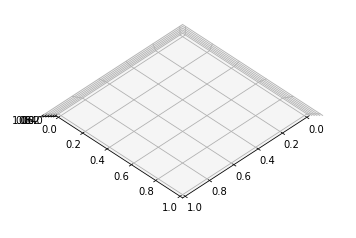

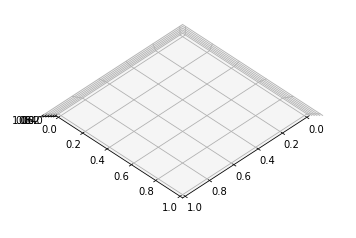

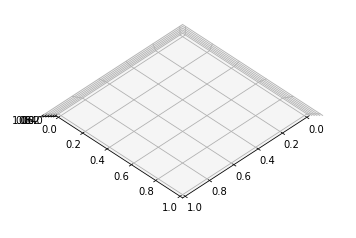

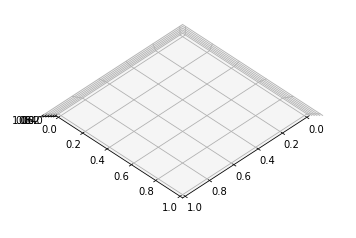

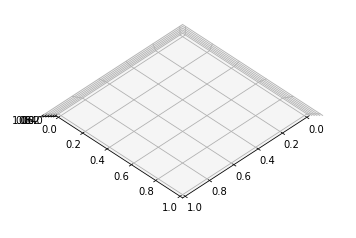

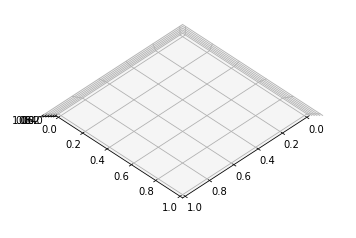

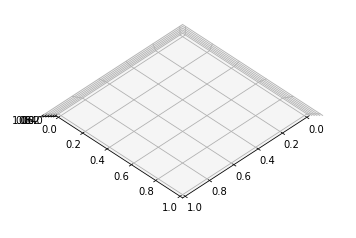

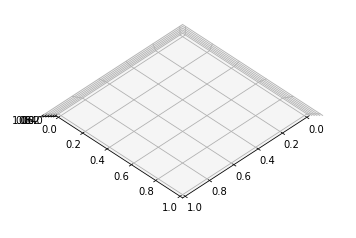

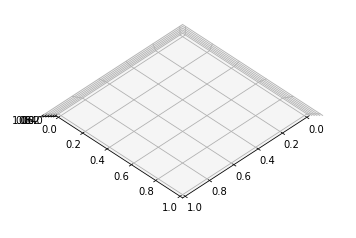

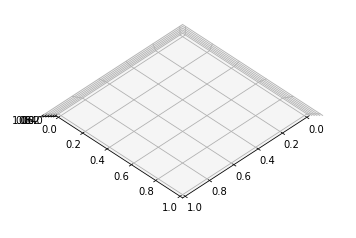

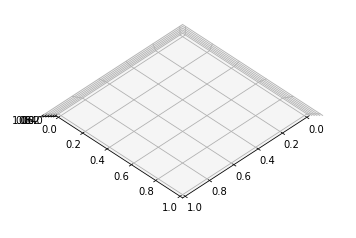

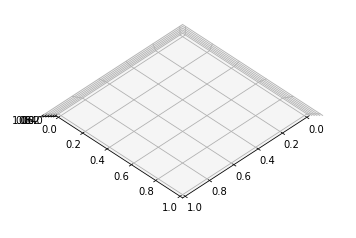

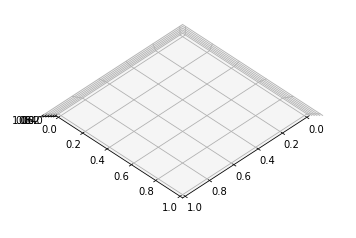

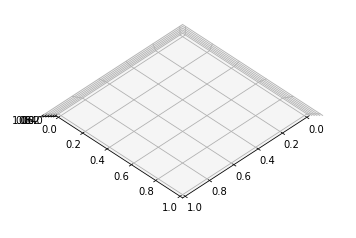

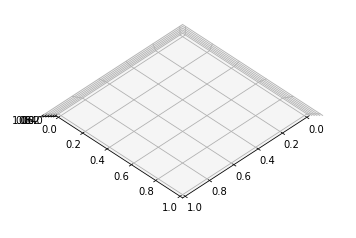

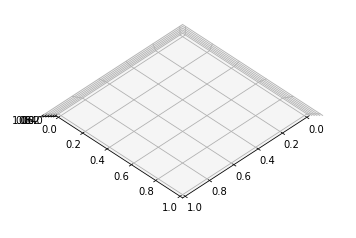

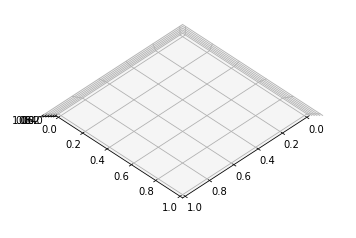

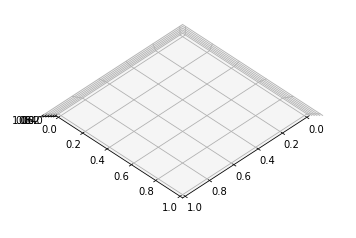

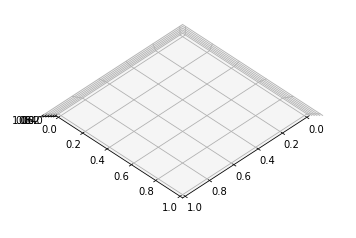

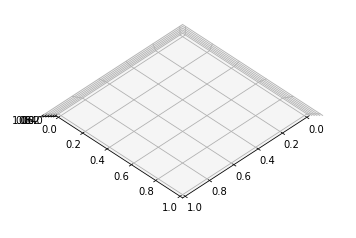

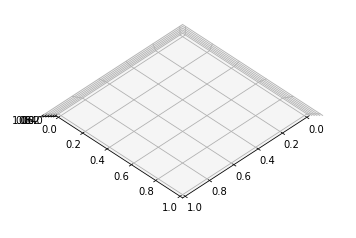

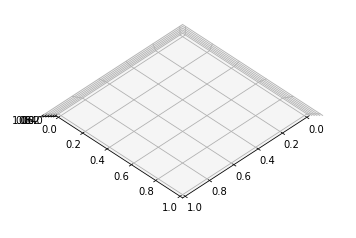

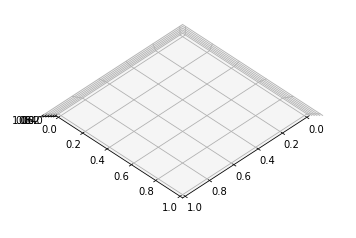

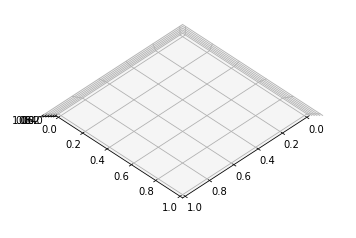

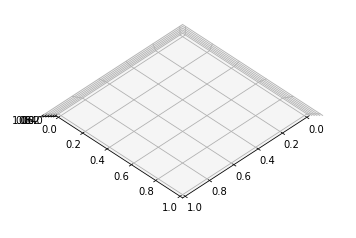

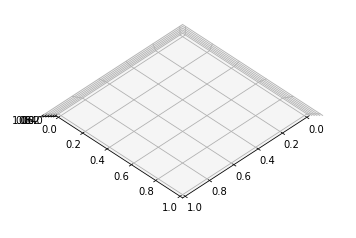

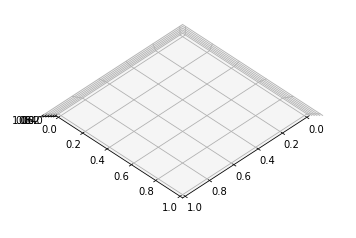

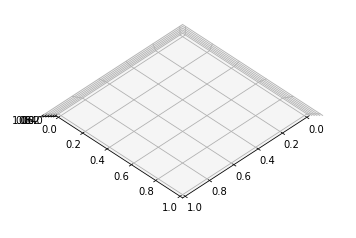

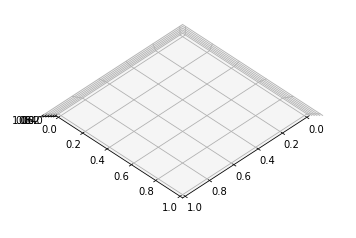

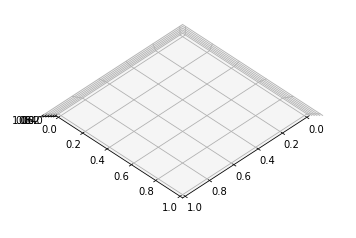

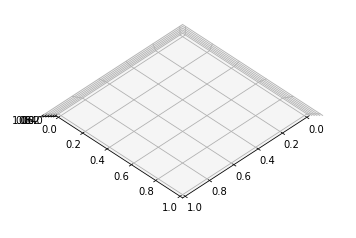

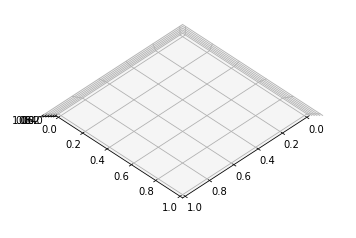

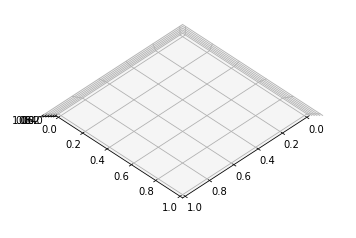

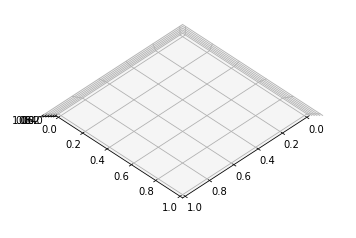

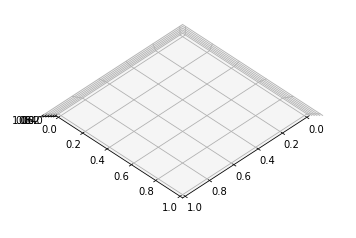

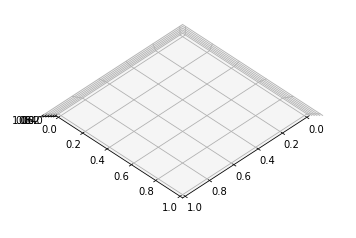

In [27]:
def normalize(arr):
    return (arr-np.mean(arr))/(np.std(arr)+1e-9)

def dist(positions):
    arr = np.array(positions)
    return np.sqrt(np.sum(arr**2))

paths = ['/home/minaessam/Documents/dicom_test/datasets_annotated_by_marina/',\
         '/home/minaessam/Documents/dicom_test/datasets-annotated by-mayar']
lines = {'2ch':[],
        '3ch':[],
        '4ch':[],
        'apical':[],
        'basal':[],
        'mid':[]}
 
counter = 0
points = {}

for path in paths:
    protocols = set()
    for root,dirs,files in (os.walk(path)):
        
        lines = {'2ch':[],
        '3ch':[],
        '4ch':[],
        'apical':[],
        'basal':[],
        'mid':[]}
        #per patient
        error = False
        
        if(len(files) == 0):
             error = True
           
        for file in files:
            #print(file)
            
            if ".dcm" in file.lower() :
                try:
                    image = dcm.read_file(os.path.join(root,file))
                    sl_type = ''
                    for key in slices.keys():
                        if key in file:
                            sl_type = slices[key]
                            #take only labeled stuff
                    if sl_type:
                        lines[sl_type].append(Line(colors[sl_type],image.SliceLocation,image.Manufacturer,\
                                            dist(image.ImagePositionPatient),image.ProtocolName,\
                                                   image.ImagePositionPatient,*image.ImageOrientationPatient))
                        protocols.add((image.ProtocolName,sl_type))
                        error = False
                    else :
                        error = True
                        break
                        
                except  :
                    #print (root,file)
                    error = True
                    break
        
        
        for key in lines.keys():
            if len(lines[key]) == 0:
                error = True
                #print(root)
            
        if error:
            continue
        print(protocols)
        choose = ['2ch','3ch','4ch']
        counter +=1
        fig = plt.figure()
        #print(root)
        ax = fig.gca(projection='3d')
        ax.view_init(elev=90., azim=45)
#         x1=  np.array([line.position[0] for key in lines.keys() \
#                        for line in lines[key] if key in choose])
#         x1_mean = 0#np.mean(x1)
#         x1_std = 1#np.std(x1)
#         y1=  np.array([line.position[1] for key in lines.keys()\
#                        for line in lines[key] if key in choose])
#         y1_mean = 0#np.mean(y1)
#         y1_std = 1#np.std(y1)
#         z4 = [line.distance for key in lines.keys() \
#               for line in lines[key] if key in choose]
#         z4_mean = 0#np.mean(z4)
#         z4_std = 1#np.std(z4)


        z4 = [line.distance for line in lines['3ch'] ]
        
        z4_mean = z4[0]#np.mean(z4)
        z4_std = 1#np.std(z4)
        z1_mean= np.array([(line.slice_location/100.0) for line in lines['3ch'] ])[0]
        #print(len(x1),len(y1),len(z4))
        #print(x1,y1,z4,sep='\n')
        #ax.scatter3D(x1 ,y1 ,z4, c=lines[key][0].color)
        for i,key in enumerate(lines.keys()):
            if True:
                break
            if key  not in choose:
                continue
#             if i < 3:
#                 continue
            #x1=  np.array([line.point1[0] for line in lines[key]])
            #x1 = (x1-x1_mean)/x1_std
            #x1 = normalize(x1)*100
            #x1= [line.point1[0] for line in lines[key]]
            x1= np.array([math.degrees(math.acos(line.point1[0])) for line in lines[key]])
            x2= [line.point2[0] for line in lines[key]]
            x2 = normalize(x2)*100
            #x2= np.array([math.degrees(math.acos(line.point2[0])) for line in lines[key]])
            #y1 = np.array([line.point1[1] for line in lines[key]])
            #y1 = (y1-y1_mean)/ y1_std
            #y1 = normalize(y1)*100
            #y1= [line.point1[1] for line in lines[key]]
            y1= np.array([math.degrees(math.acos(line.point1[1])) for line in lines[key]])
            #y2= [line.point2[1] for line in lines[key]]
            #z1= [line.point1[2] for line in lines[key]]
            #z0= np.array([line.point1[2] for line in lines[key]])
            #z0 = normalize(z0)*100
            z1= [math.degrees(math.acos(line.point1[2])) for line in lines[key]]
            #z1= np.array([(line.slice_location/100.0) for line in lines[key]])
            #z1 = [line.position[2] for line in lines[key]]
            #z1 = (z1-np.mean(z1))
            #z2= np.array([line.point2[2] for line in lines[key]])
            #z2 = normalize(z2)
            z3 = [ 0 if "sie" in line.manufac.lower()  else 1  for line in lines[key]  ]
            #print(sum(z3))
            z4 = np.array([line.distance for line in lines[key]])
            #z4 = (z4-z4_mean)/ z4_std
            #z4 = (z4-np.mean(z4))
            #print(np.sum(z3))
            #print(z1[0])
            ax.scatter3D(x1,y1 ,z1, c=lines[key][0].color)
#             txt = ''
#             for i in os.listdir(root):
#                 if ".dcm" not in i.lower():
#                     continue
#                 if "rest" in i.lower():
#                     txt = "rest"
#                 else:
#                     txt = "else"
#                     break
            
#             ax.text(x=0,y=0,z=0,s=txt)
#             try:
#                 points[(x1[0],z1[0] ,z4[0],key)] +=1
#             except:
#                 points[(x1[0],z1[0] ,z4[0],key)] = 1

protocols
# print(len(points))
# points

In [8]:
ax.text??

In [7]:
paths = ['/home/minaessam/Documents/dicom_test/datasets_annotated_by_marina/1007_exam_mf_2018_3_22_15_30']
lines = {'2ch':[],
        '3ch':[],
        '4ch':[],
        'apical':[],
        'basal':[],
        'mid':[]}
for path in paths:
    for root,dirs,files in os.walk(path):
        
        lines = {'2ch':[],
        '3ch':[],
        '4ch':[],
        'apical':[],
        'basal':[],
        'mid':[]}
        #per patient
        error = False
        
        if(len(files) == 0):
             error = True
           
        for file in files:
            #print(file)
            
            if ".dcm" in file.lower() :
                try:
                    image = dcm.read_file(os.path.join(root,file))
                    sl_type = ''
                    for key in slices.keys():
                        if key in file:
                            sl_type = slices[key]
                            #take only labeled stuff
                    if sl_type:
                        lines[sl_type].append(Line(colors[sl_type],image.SliceLocation,image.Manufacturer,\
                                            dist(image.ImagePositionPatient),image.ProtocolName,\
                                                   image.ImagePositionPatient,*image.ImageOrientationPatient))
                        error = False
                    else :
                        error = True
                        break
                        
                except  :
                    print (root,file)
                    error = True
                    break
        
        
        for key in lines.keys():
            if len(lines[key]) == 0:
                error = True
                print(root)
            
        if error:
            continue
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        x1=x2=y1=y2=z1=z2=z4=[]
        for i,key in enumerate(lines.keys()):
            print(key,lines[key][0].color)
            
            if i >6:
                break

            x1= [line.position[0] for line in lines[key]]
            #x1= [line.point1[0] for line in lines[key]]
            #x1= np.array([math.degrees(math.acos(line.point1[0])) for line in lines[key]])
            x2= [line.point2[0] for line in lines[key]]
            #x2= np.array([math.degrees(math.acos(line.point2[0])) for line in lines[key]])
            y1 = [line.position[1] for line in lines[key]]
            #y1= [line.point1[1] for line in lines[key]]
            #y1= np.array([math.degrees(math.acos(line.point1[1])) for line in lines[key]])
            #y2= [line.point2[1] for line in lines[key]]
            #z1= [line.point1[2] for line in lines[key]]
            z0= np.array([line.point1[2] for line in lines[key]])
            z0 = normalize(z0)*100
            #z1= [math.degrees(math.acos(line.point1[2])) for line in lines[key]]
            z1= np.array([line.slice_location/100.0 for line in lines[key]])
            #z1 = [line.position[2] for line in lines[key]]
            z1 = normalize(z1)*100
            #z2= np.array([line.point2[2] for line in lines[key]])
            #z2 = normalize(z2)
            z3 = [ 0 if "sem" in line.manufac.lower()  else 1  for line in lines[key]  ]
            #print(sum(z3))
            z4 = [line.distance for line in lines[key]]
            z4 = normalize(z4)*100
            print(len(x1),len(y1),len(z4))
            #print(np.sum(z3))
            print(x1,y1,z4,sep='\n')
            ax.scatter3D(x1,y1 ,z4, c=lines[key][0].color)
            ax.view_init(elev=90., azim=45)

/home/minaessam/Documents/dicom_test/datasets_annotated_by_marina/1007_exam_mf_2018_3_22_15_30 SENC1007_REST_4CH__17.dcm__2c1b666b-fc06-46bc-859d-fdaf39f00835__06e0b5f8-0106-4981-8072-8f55789c498d__3deff6d3-9b02-4944-a47f-102a7f7f7273
/home/minaessam/Documents/dicom_test/datasets_annotated_by_marina/1007_exam_mf_2018_3_22_15_30
/home/minaessam/Documents/dicom_test/datasets_annotated_by_marina/1007_exam_mf_2018_3_22_15_30
/home/minaessam/Documents/dicom_test/datasets_annotated_by_marina/1007_exam_mf_2018_3_22_15_30
/home/minaessam/Documents/dicom_test/datasets_annotated_by_marina/1007_exam_mf_2018_3_22_15_30
/home/minaessam/Documents/dicom_test/datasets_annotated_by_marina/1007_exam_mf_2018_3_22_15_30
/home/minaessam/Documents/dicom_test/datasets_annotated_by_marina/1007_exam_mf_2018_3_22_15_30


In [104]:

arr = np.array(ds.pixel_array.shape, ds.pixel_array.dtype)
arr = ds.pixel_array
arr.shape

(38, 96)

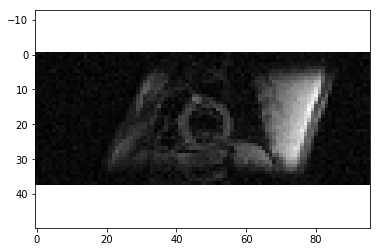

In [105]:
plt.axes().set_aspect('equal', 'datalim')
plt.imshow(arr, cmap='gray')

In [80]:
import cv2
import math

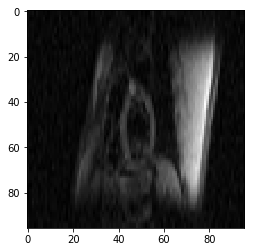

In [106]:
# x = max(arr.shape[0],arr.shape[1])
# arr2 = np.zeros((x,x),dtype=arr.dtype)
# print(arr2.shape)
# x_start = (x-arr.shape[0])//2
# y_start = (x-arr.shape[1]) //2
# print(x_start,y_start) 
# arr2[x_start:x-x_start,y_start:x-y_start] = arr

img = cv2.resize(arr, (max(arr.shape[0],arr.shape[1]),max(arr.shape[0],arr.shape[1])), cv2.INTER_CUBIC)
plt.imshow(img, cmap='gray')

True

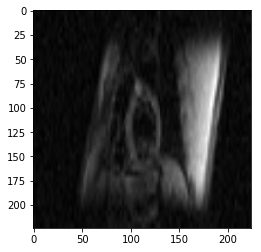

In [107]:
img = cv2.resize(arr, (224,224), cv2.INTER_CUBIC)
plt.imshow(img, cmap='gray')
cv2.imwrite('out.jpg',img)

In [108]:
x_vec = [math.degrees(math.acos(x)) for x in ds.ImageOrientationPatient[0:3]]
y_vec = [math.degrees(math.acos(y)) for y in ds.ImageOrientationPatient[3:6]]
print(x_vec,y_vec)

[55.419308517909386, 35.2958905041912, 83.78496992205211] [102.66261748982654, 73.94581693368318, 159.3358721320002]


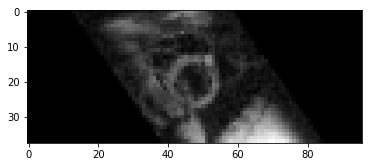

In [109]:
matrix = cv2.getRotationMatrix2D((arr.shape[1]/2,arr.shape[0]/2),-x_vec[0],1)
row,col = arr.shape
img = cv2.warpAffine(arr,matrix,(col,row))
plt.imshow(img,cmap='gray')

In [37]:
if ' ':
    print("ok")

ok


/home/minaessam/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


{('SIEMENS', 'STRESS PERFUSION + GAD')}

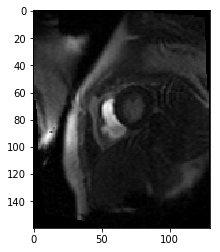

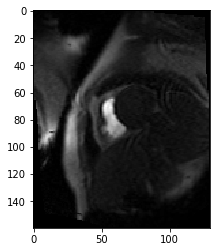

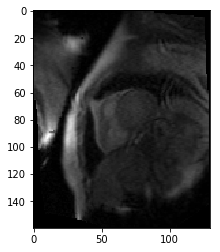

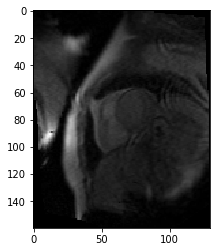

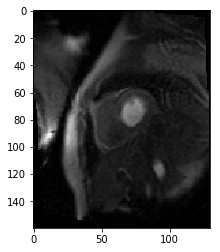

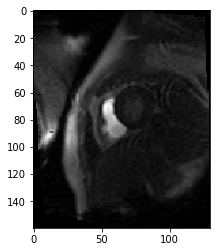

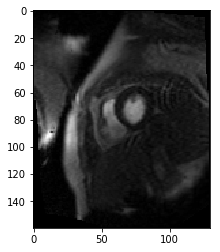

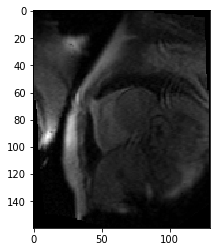

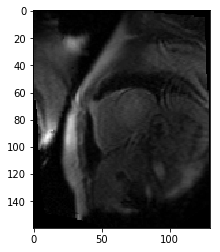

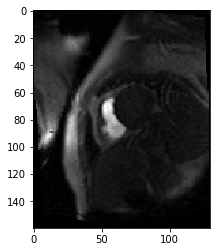

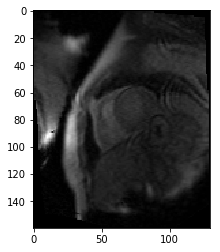

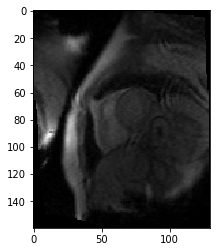

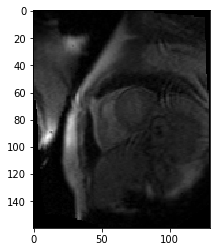

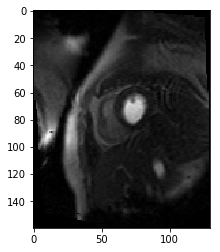

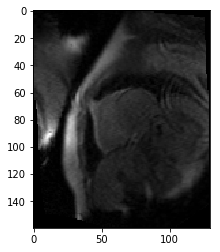

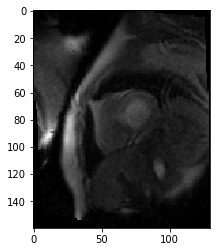

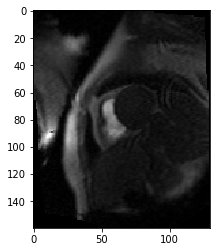

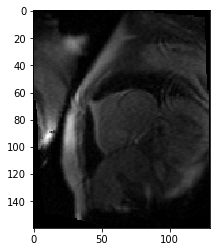

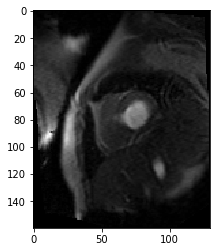

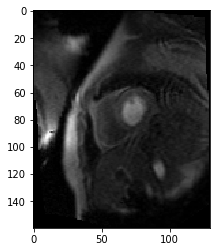

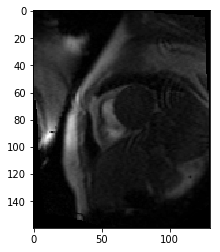

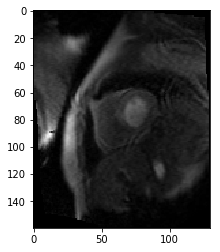

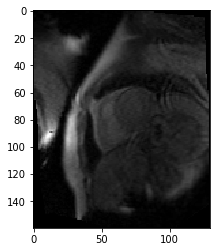

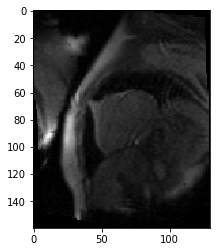

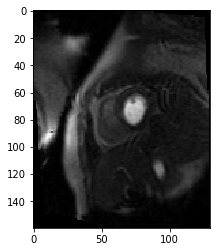

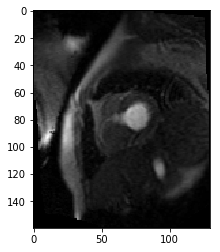

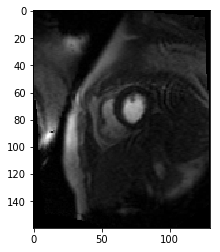

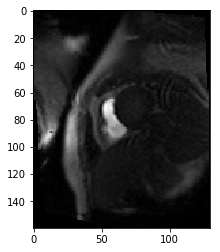

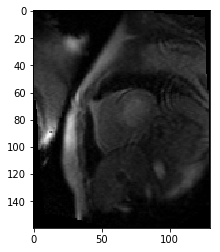

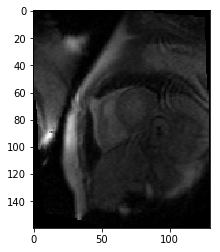

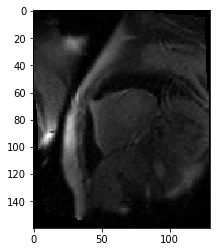

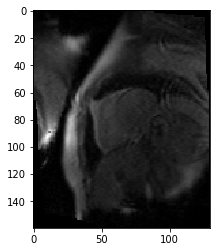

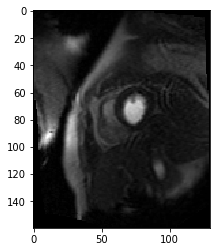

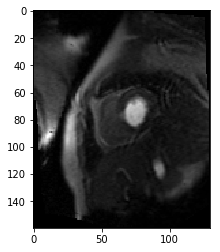

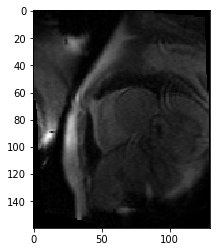

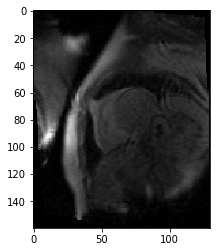

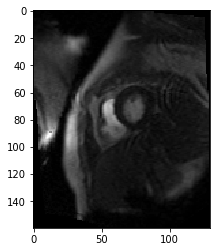

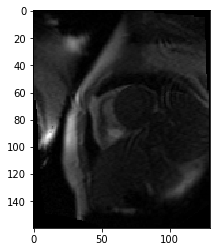

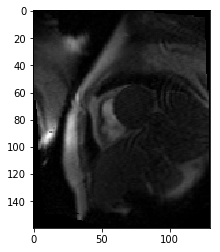

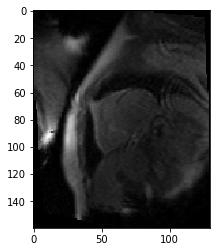

In [55]:
path = \
'/home/minaessam/Documents/dicom_test/seimens/BDK__54773(low image quality starting from time frame after ES)/STRESS_PERFUSION_+_GAD_0049'

protocols = set()
for image_name in os.listdir(path):
    
    if (True)  :
                example = []
                try:
                    #separate images containing different stages
                    dicom = dcm.read_file(os.path.join(path,image_name),force=True)
                    if "sie" not in dicom.Manufacturer.lower():
                        print(dicom.Manufacturer)
                        continue
#                     example.append( [*dicom.ImageOrientationPatient[0:3]\
#                                ,*dicom.ImagePositionPatient\
#                                ,dist(dicom.ImagePositionPatient)\
#                                      ,dicom.SliceLocation,image_name])
                    protocols.add((dicom.Manufacturer,dicom.ProtocolName))
                    fig = plt.figure()
                    plt.imshow(dicom.pixel_array,cmap='gray')
    
                except OSError:
                    print("exception found at ",os.path.join(path,image_name))
    
    
protocols

In [32]:
len(examples)

7